In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import os
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

plt.rcParams['figure.figsize'] = (30.0, 18.0) # 设置figure_size尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style

sns.set(style='white', context='notebook', palette='deep')

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
print(os.listdir("./data"))
# Any results you write to the current directory are saved as output.

['census.csv']


In [3]:
data = pd.read_csv("./data/census.csv")
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
# data.describe()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


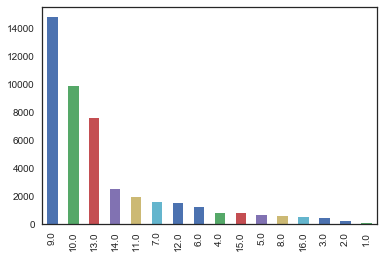

In [6]:
data['education-num'].value_counts().plot(kind='bar')

In [7]:
# TODO：总的记录数
n_records = len(data)
# TODO：被调查者的收入大于$50,000的人数
n_greater_50k = len(data.loc[data["income"]==">50K"])
# TODO：被调查者的收入最多为$50,000的人数
n_at_most_50k = len(data.loc[data["income"]=="<=50K"])
# TODO：被调查者收入大于$50,000所占的比例
greater_percent = float(n_greater_50k)/n_records

# 打印结果
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent*100))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


In [8]:
# 将数据切分成特征和对应的标签
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

In [9]:
# 导入sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# 显示一个经过缩放的样例记录
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


In [10]:
# TODO：将'income_raw'编码成数字值
income = pd.get_dummies(income_raw)['>50K']
income.head()

0    0
1    0
2    0
3    0
4    0
Name: >50K, dtype: uint8

In [11]:
# TODO：使用pandas.get_dummies()对'features_raw'数据进行独热编码
features = pd.get_dummies(features_raw)
# 打印经过独热编码之后的特征数量
encoded = list(features.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
# 移除下面一行的注释以观察编码的特征名字
print(encoded)
print(features.shape)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [12]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [13]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [14]:
features.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.02174,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.00000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# income.value_counts().plot(kind='bar')
income.shape
features.shape

(45222, 103)

# 2.0 data preprocessing
##  2.1 unuse get_dummies, function like LabelEncoder

1. education_level
1. marital-status
1. occupation
1. relationship
1. race
1. sex
1. native-country
1. workclass

In [16]:
colmap = {}
def mapcol(fdata, colstr):
    print(colstr)
    if colmap.get(colstr, -1) > 0:
        colmap.pop(colstr)
    occupation_array = fdata[colstr].unique()
    col_dict = {}
    for i in range(len(occupation_array)):
        # print(occupation_array[i])
        col_dict[occupation_array[i]] = i
    fdata[colstr] = fdata[colstr].map(col_dict)
    print('col:{} map:{}'.format(colstr, col_dict))
    colmap[colstr] = col_dict

# set xtick
def selfxticklabels(colstr):
    col_dict = {}
    col_dict = colmap.get(colstr)
    xticklabels = []
    if len(col_dict) > 0:
        for k,v in col_dict.items():
           xticklabels.append(k)
#     print(xticklabels)
    return xticklabels

# set ytick
def selfyticklabels(colstr):
    col_dict = {}
    col_dict = colmap.get(colstr)
    yticklabels = []
    print(colstr)
    if len(col_dict) > 0:
        print(col_dict)
        yticklabels.append('0.0')
        for k,v in col_dict.items():
           yticklabels.append(k)
    print(yticklabels)
    return yticklabels

In [17]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [18]:
# Missing values statistics
missing_values = missing_values_table(data)
missing_values.head(20)

Your selected dataframe has 14 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [19]:
data.dtypes.value_counts()

object     9
float64    4
int64      1
dtype: int64

In [20]:
# Number of unique classes in each object column
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

workclass           7
education_level    16
marital-status      7
occupation         14
relationship        6
race                5
sex                 2
native-country     41
income              2
dtype: int64

In [21]:
fdata = data.copy()

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in fdata:
    if col == 'income':
        continue
    if fdata[col].dtype == 'object':
        # If 2 or fewer unique categories
#         print(fdata[col].dtype)
        if len(list(fdata[col].unique())) <= 16:
            print(col)
            # Train on the training data
            le.fit(fdata[col])
            # Transform both training and testing data
            fdata[col] = le.transform(fdata[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

workclass
education_level
marital-status
occupation
relationship
race
sex
7 columns were label encoded.


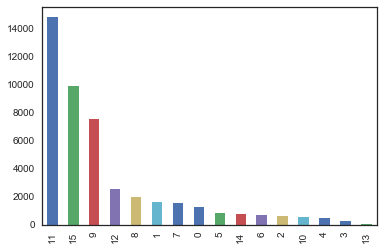

In [23]:
# mapcol(fdata, 'education_level')
fdata['education_level'].value_counts().plot(kind='bar')

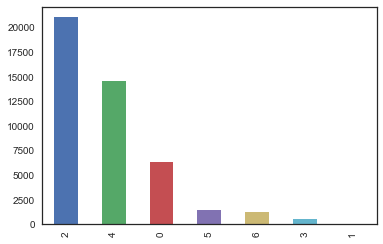

In [24]:
# mapcol(fdata, 'marital-status')
fdata['marital-status'].value_counts().plot(kind='bar')

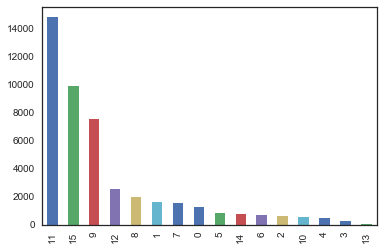

In [25]:
# col_dict = colmap.get('education_level')
# if len(col_dict) > 0:
#     for k,v in col_dict.items():
#        print(k,v)
# fdata['education_level'].map({' Preschool': 1, 
#                               ' Assoc-acdm': 3,
#                               ' Prof-school': 5,
#                               ' HS-grad': 7,
#                               ' Assoc-voc':9,
#                               ' Some-college': 11,
#                               ' Bachelors': 13,
#                               ' Masters': 15,
#                               ' Doctorate': 16,
#                               ' 1st-4th': 2,
#                               ' 5th-6th': 4,
#                               ' 7th-8th': 6,
#                               ' 9th': 8,
#                               ' 10th': 10,
#                               ' 11th': 12,
#                               ' 12th': 14,})
# fdata['education_level'].unique()
fdata['education_level'].value_counts().plot(kind='bar')

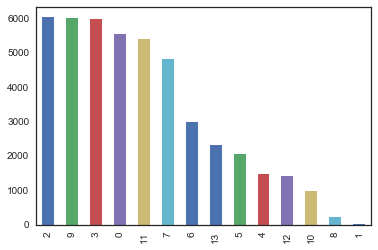

In [26]:
# mapcol(fdata, 'occupation')
fdata['occupation'].value_counts().plot(kind='bar')

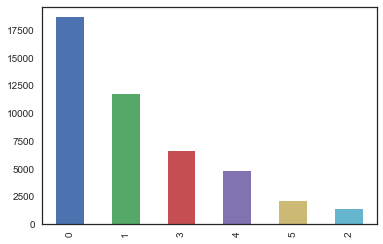

In [27]:
# mapcol(fdata, 'relationship')
fdata['relationship'].value_counts().plot(kind='bar')

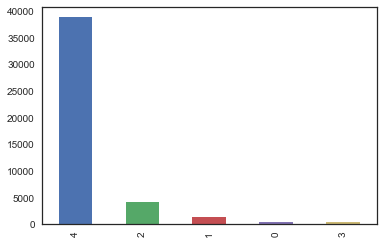

In [28]:
# mapcol(fdata, 'race')
fdata['race'].value_counts().plot(kind='bar')

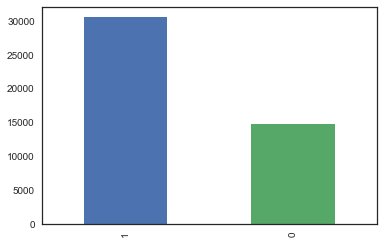

In [29]:
# mapcol(fdata, 'sex')
fdata['sex'].value_counts().plot(kind='bar')

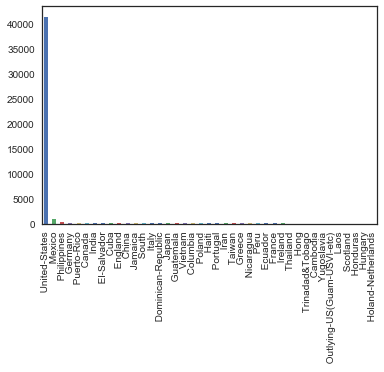

In [30]:
# mapcol(fdata, 'native-country')
fdata['native-country'].value_counts().plot(kind='bar')

In [31]:
# mapcol(fdata, 'income')
# fdata['income'].value_counts().plot(kind='bar')
# fdata.head()

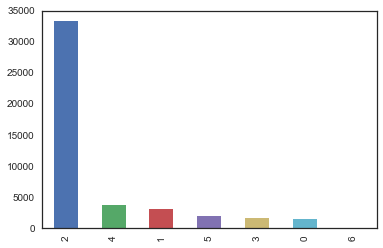

In [32]:
# mapcol(fdata, 'workclass')
fdata['workclass'].value_counts().plot(kind='bar')

## 2.2 observe feature distribution
### 2.2.1 age

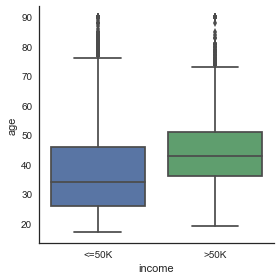

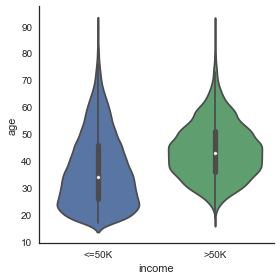

In [33]:
g = sns.factorplot(x="income", y = "age",data = fdata, kind="box")
g = sns.factorplot(x="income", y = "age",data = fdata, kind="violin")

In [34]:
# def agesegment(age):
#     return age//4
# fdata["age"] = fdata["age"].map(agesegment)
d = (fdata["age"] - fdata["age"].min())/(fdata["age"].max() - fdata["age"].min())
df = fdata.drop("age", axis=1)
df["age"] = d

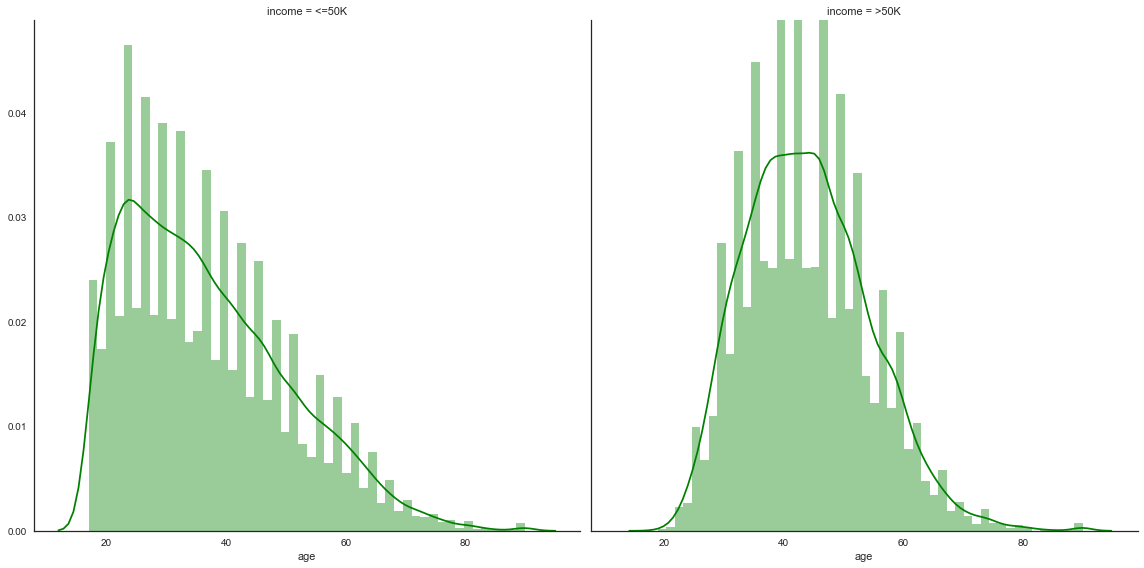

In [35]:
# Explore Age vs Survived
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, "age", color='g')

In [36]:
# f = fdata['age'].value_counts().plot(kind='bar', figsize=(20,16))
# f = sns.factorplot("age", col="income",  data=fdata,
#                    size=6, kind="count", palette="muted")
# for ax in f.axes.flatten():
#     for tick in ax.get_xticklabels():
#         # print(tick)
#         pass
# f

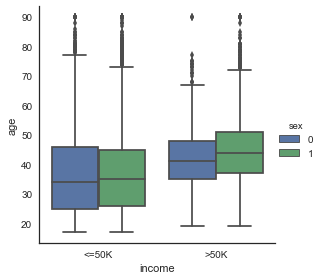

In [37]:
g = sns.factorplot(y="age",x="income",hue="sex", data=fdata, kind="box")

## 2.2.2 hours-per-week

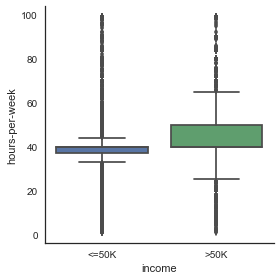

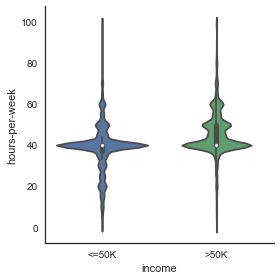

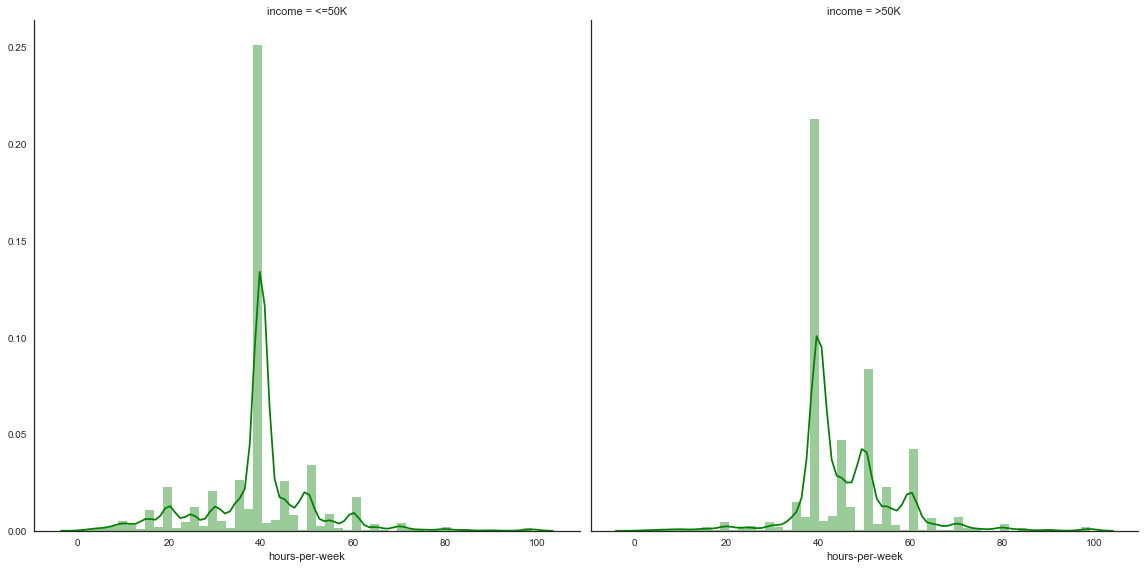

In [38]:
colname = "hours-per-week"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, colname, color='g')

In [39]:
# Explore Fare distribution 
# g = sns.distplot(fdata["hours-per-week"], color="g", label="Skewness : %.2f"%(fdata["hours-per-week"].skew()))
# g = g.legend(loc="best")

## 2.2.3 marital-status

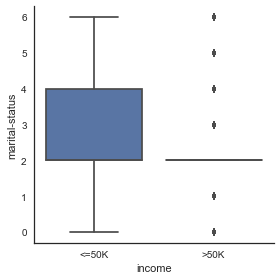

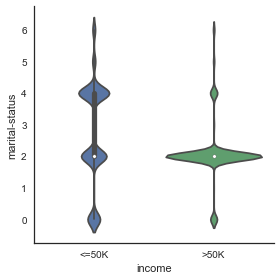

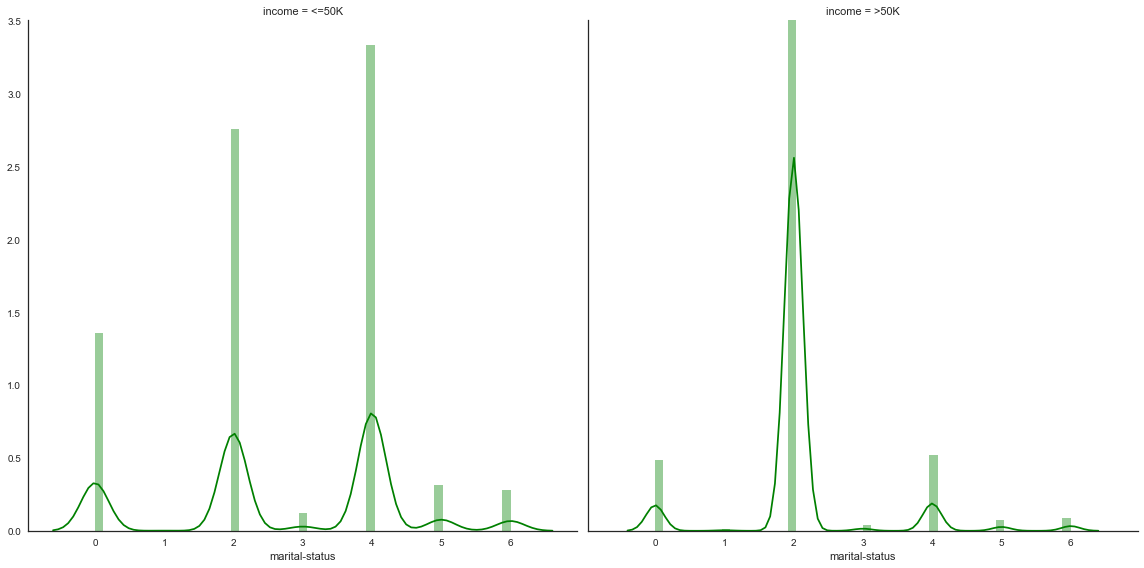

In [40]:
colname = "marital-status"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, colname, color='g')

## 2.2.4 education_level

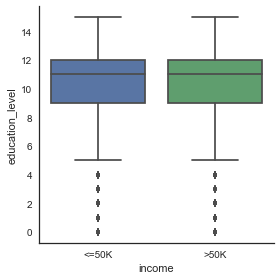

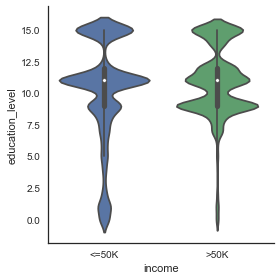

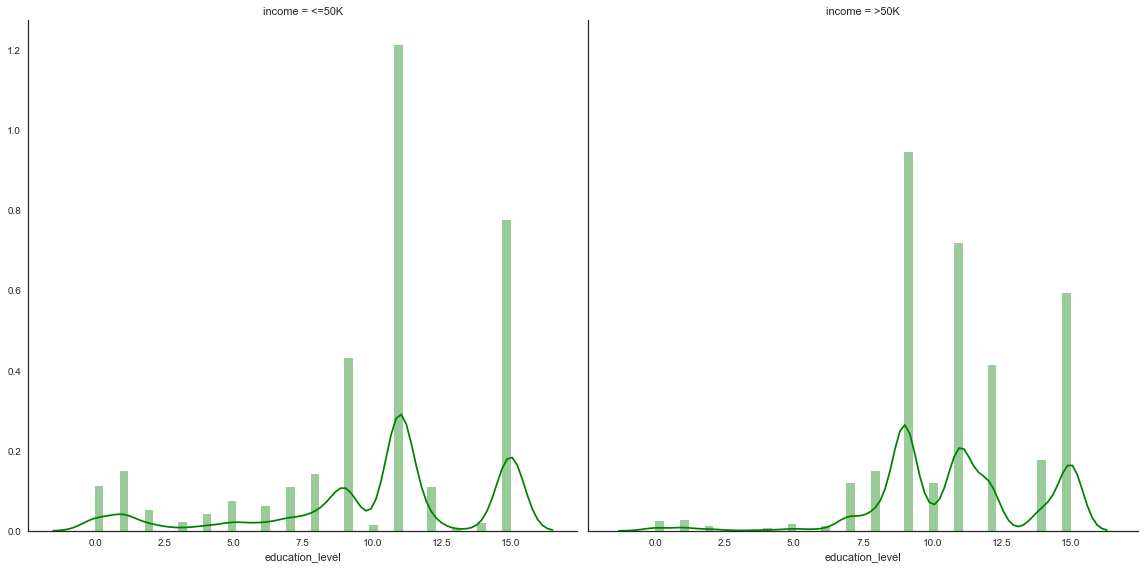

In [41]:
colname = "education_level"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, colname, color='g')

## 2.2.5 education-num

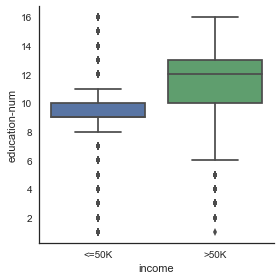

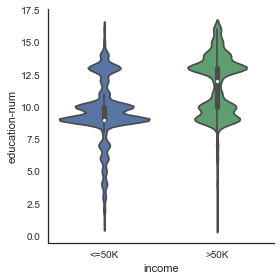

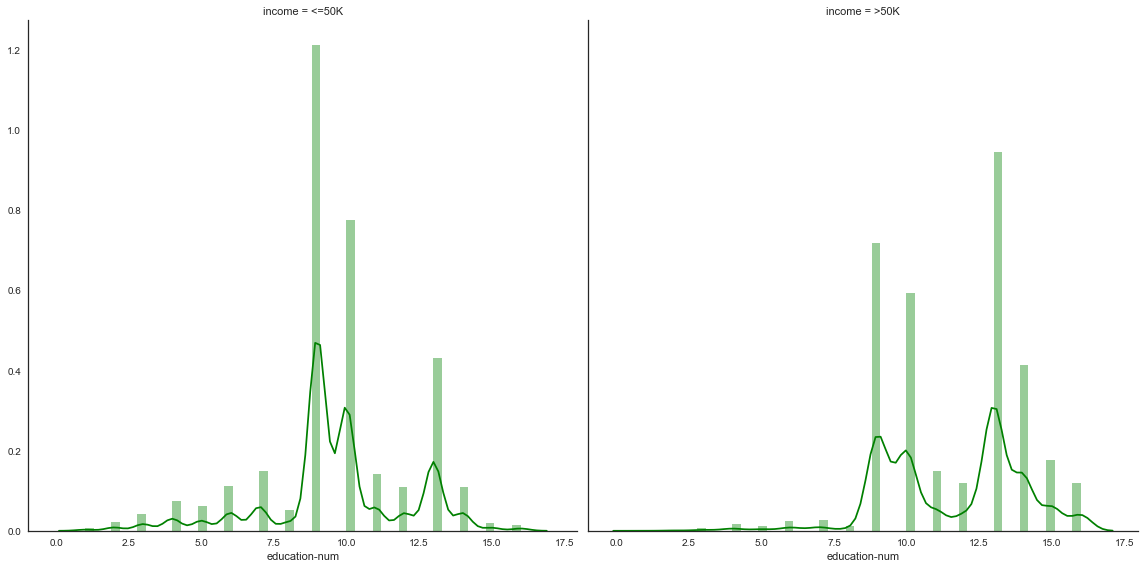

In [42]:
colname = "education-num"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, colname, color='g')

## 2.2.6 occupation

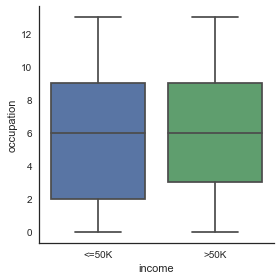

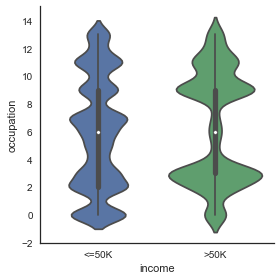

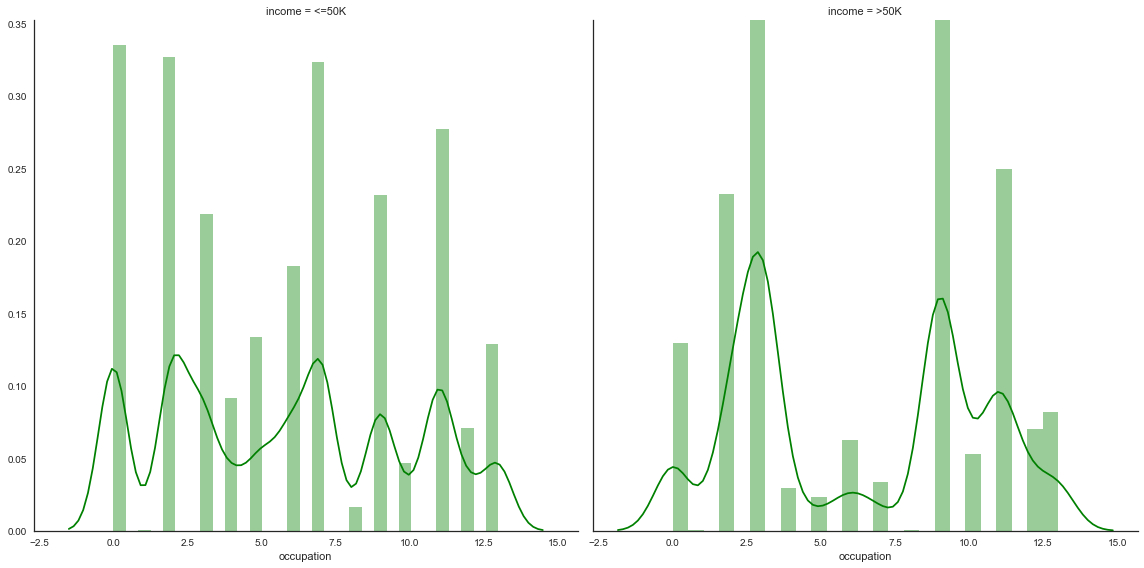

In [43]:
colname = "occupation"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
# selfxticklabels(colname)
g = g.map(sns.distplot, colname, color='g')

### 2.2.7 race

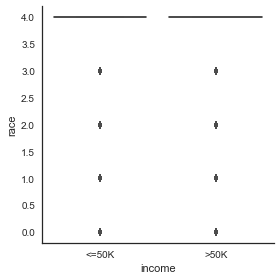

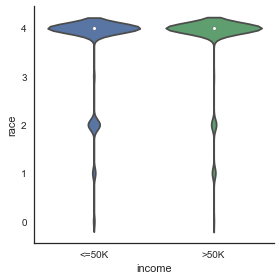

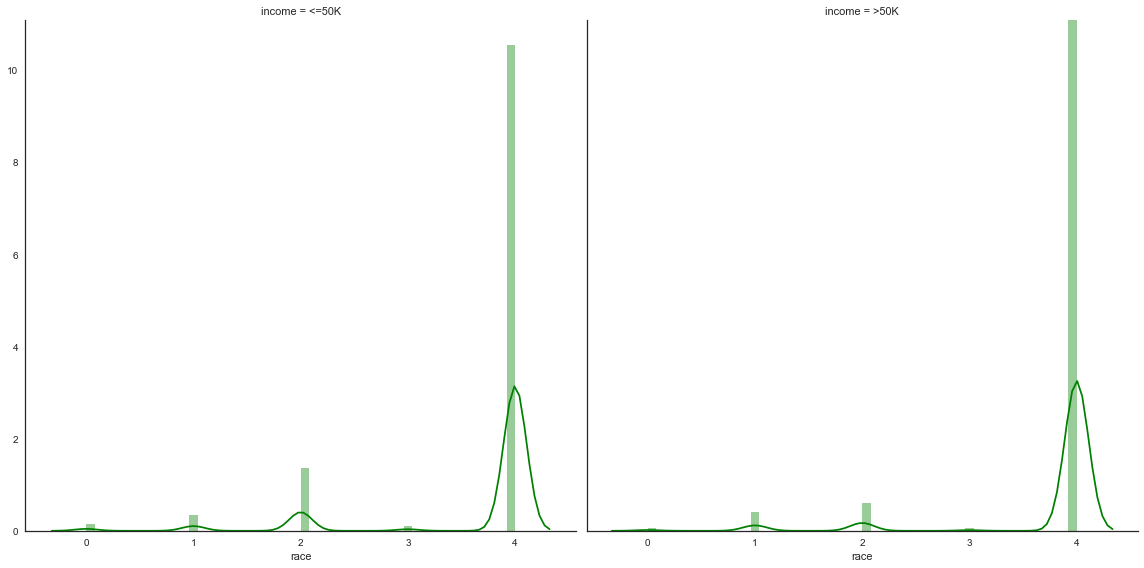

In [44]:
colname = "race"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
# yticklabels = selfyticklabels(colname)
# g.set_yticklabels(labels = yticklabels,rotation=30)
g = g.map(sns.distplot, colname, color='g')

In [45]:
# colmap.get(colname)

## 2.2.8 sex

In [46]:
# colname = "sex"
# g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
# g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
# g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
# g = g.map(sns.distplot, colname, color='g')

## 2.2.9 capital-gain

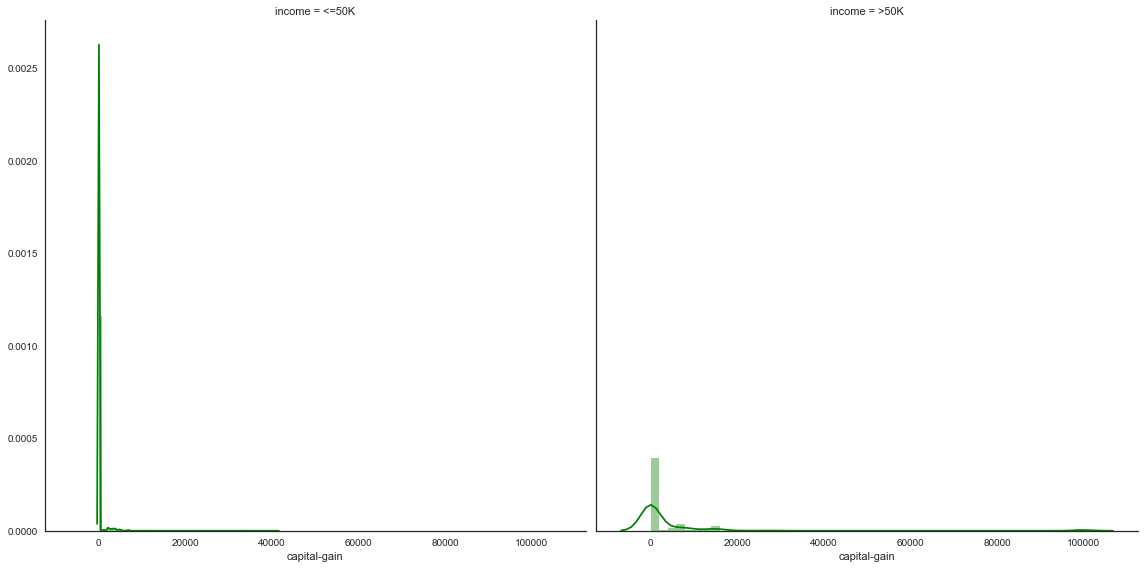

In [47]:
colname = "capital-gain"
# g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
# g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, colname, color='g')

## 2.2.10 capital-loss

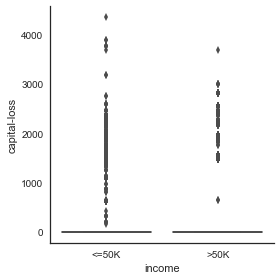

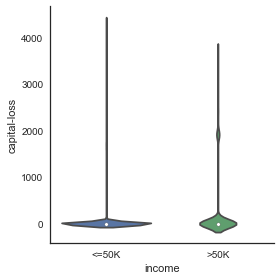

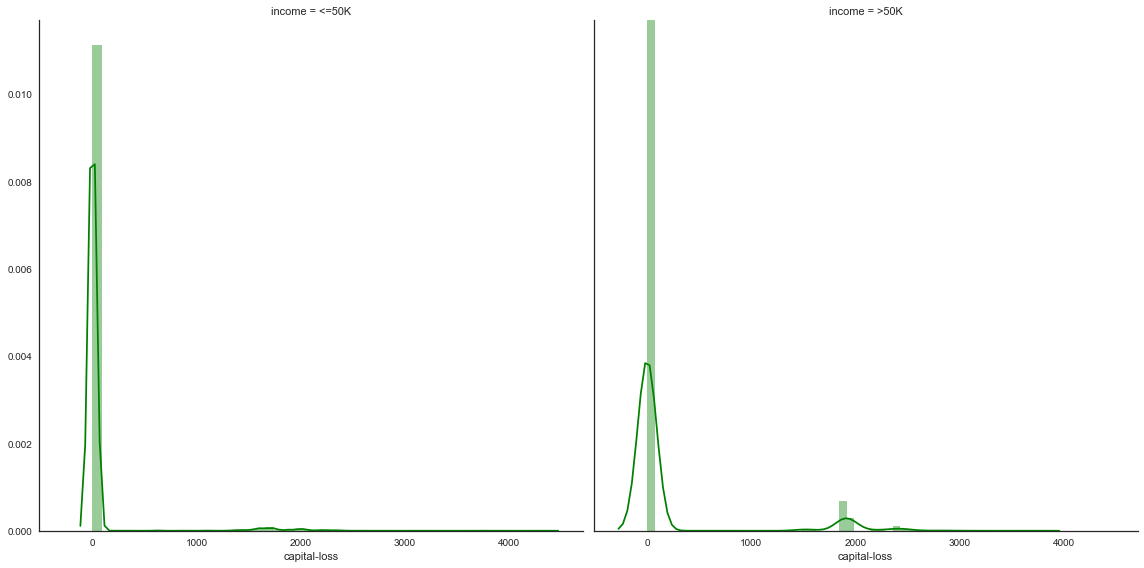

In [48]:
colname = "capital-loss"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, colname, color='g')

## 2.2.11 native-country

In [49]:
# fdata['native-country'].head()
# colname = "native-country"
# g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
# g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
# g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
# g = g.map(sns.distplot, colname, color='g')

In [50]:
# Explore Age vs Sex, Parch , Pclass and SibSP
# g = sns.factorplot(y="income",x="age",data=fdata,kind="box")
# g = sns.factorplot(y="income",x="race", data=fdata,kind="box")
# g = sns.factorplot(y="income",x="education_level", data=fdata,kind="box")
# g = sns.factorplot(y="income",x="education-num", data=fdata,kind="box")

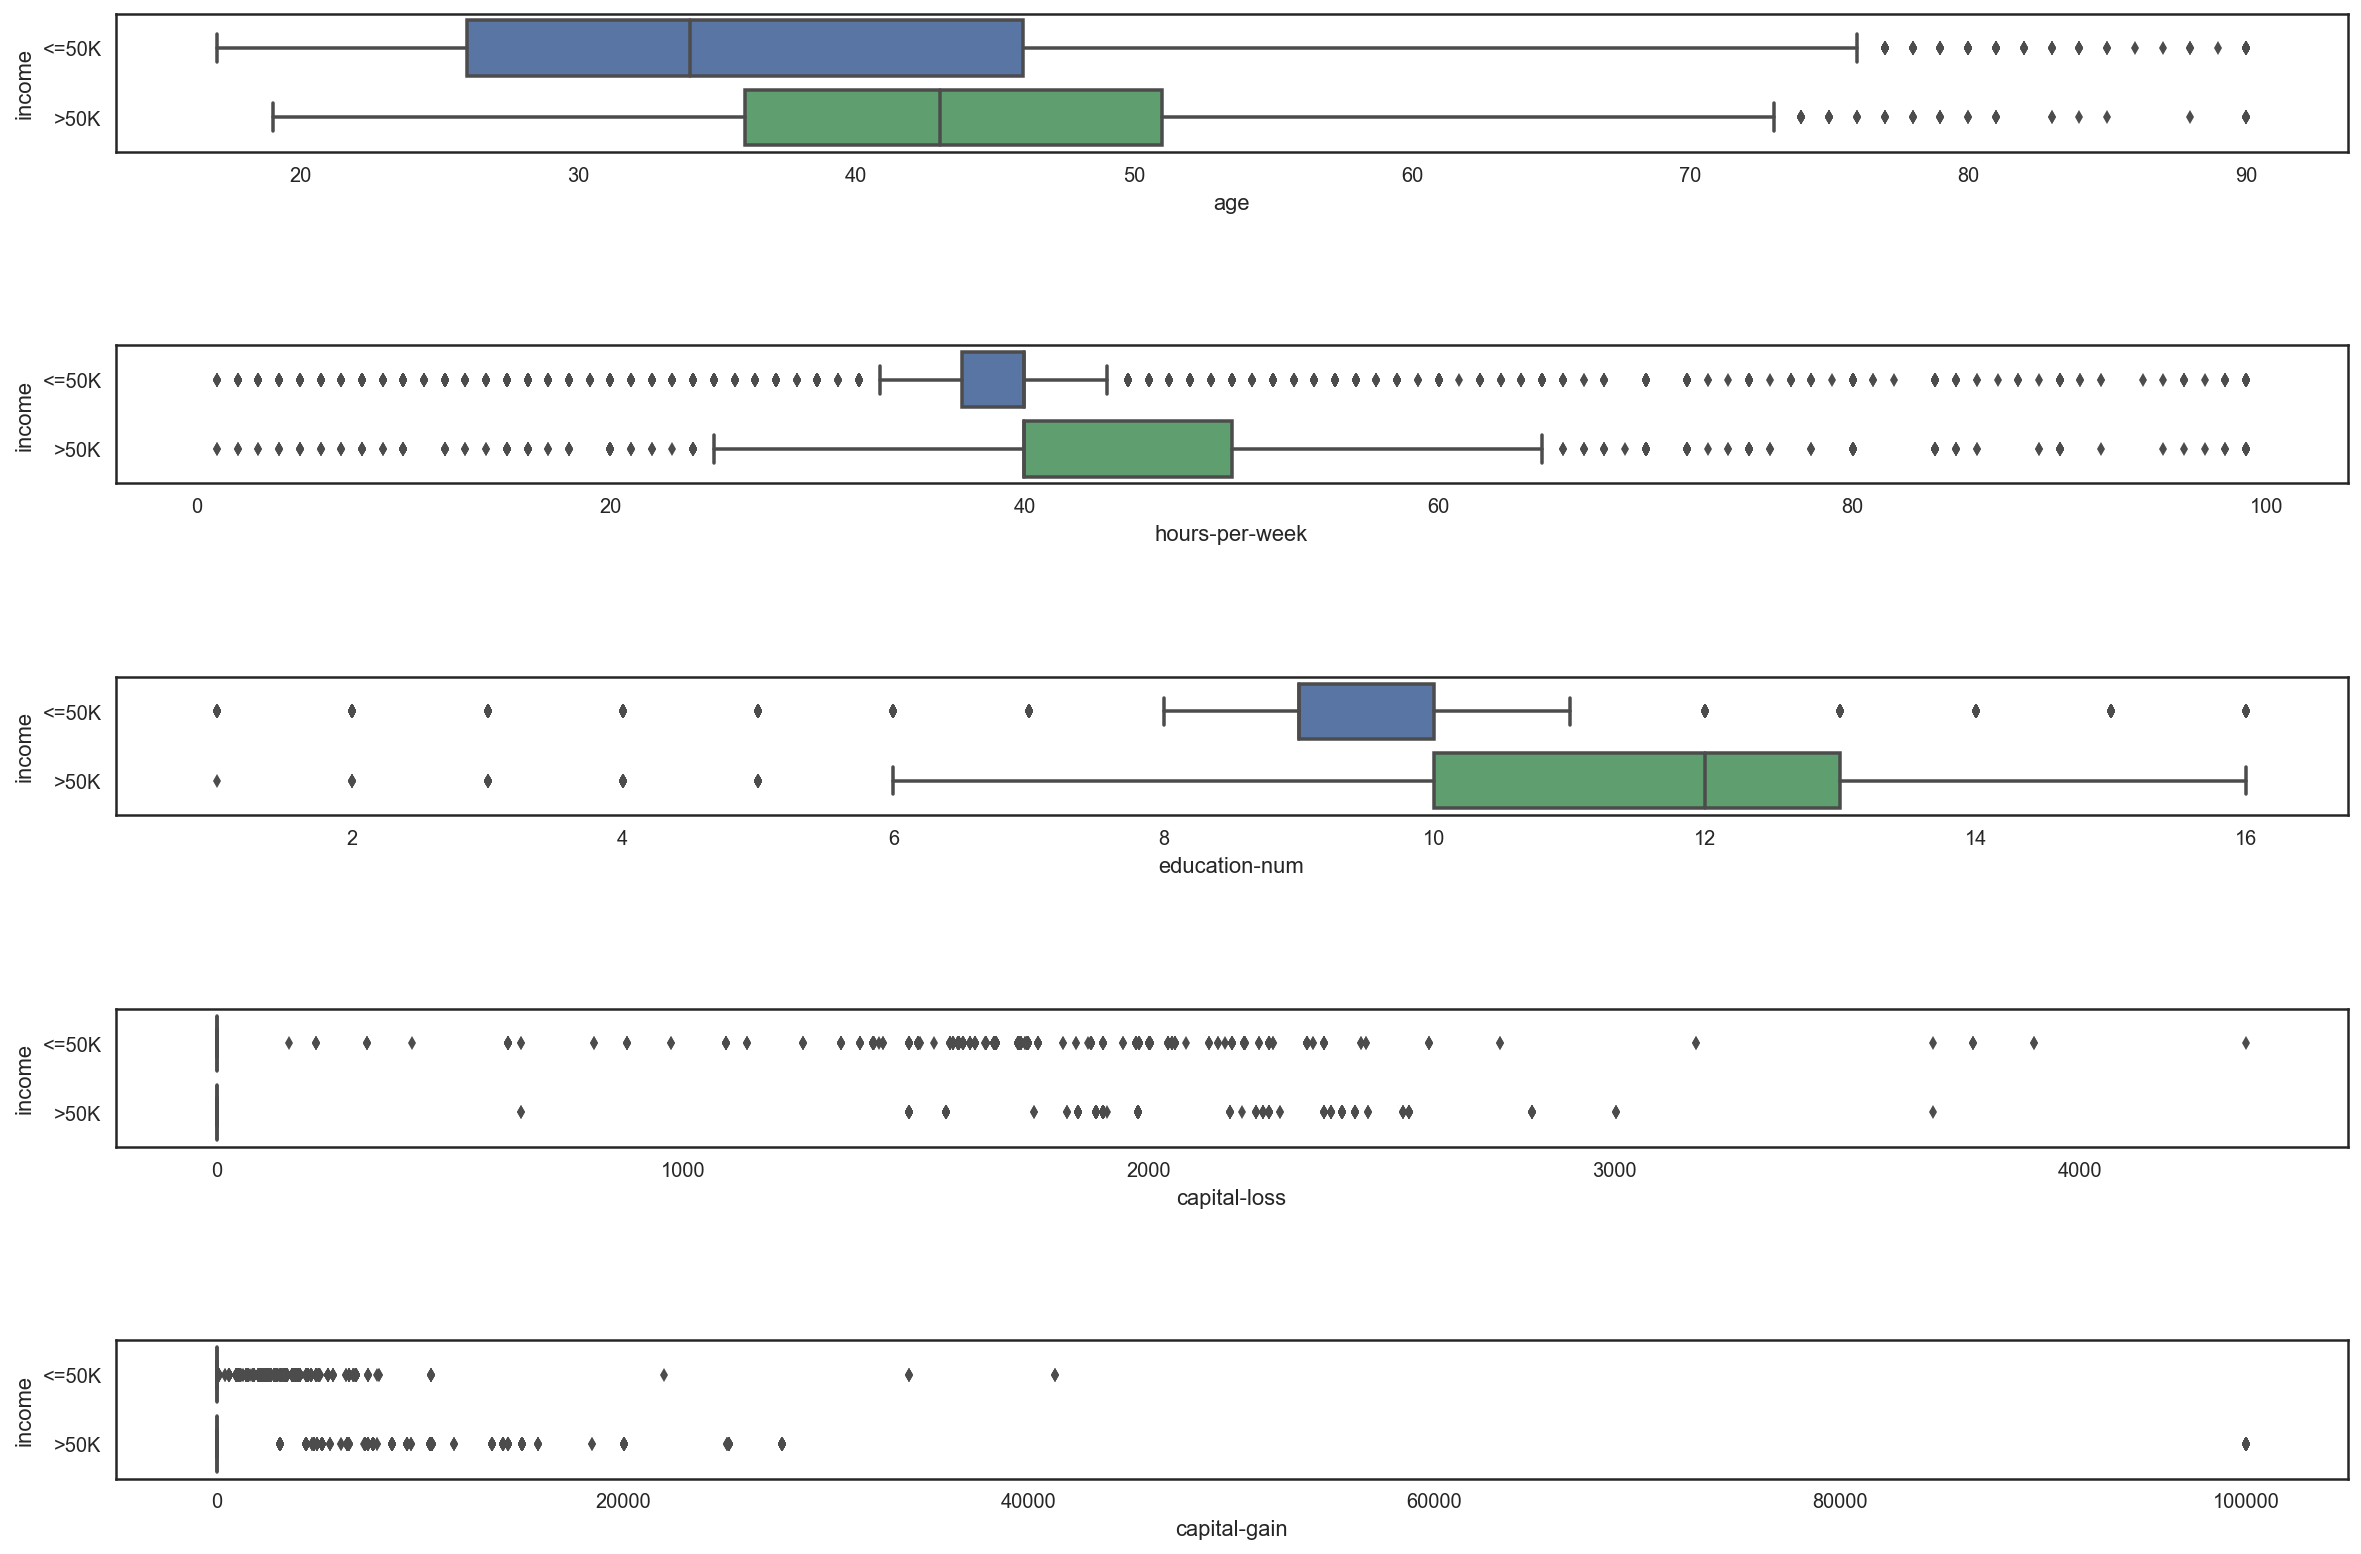

In [51]:
# fdata['age'].value_counts().plot(kind='bar', figsize=(20,16))
#  Seaborn中的boxplot，可以画箱线图，可以看出不同种类的分布情况
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(10,1,1)
ax2 = fig.add_subplot(10,1,3)
ax3 = fig.add_subplot(10,1,5)
ax4 = fig.add_subplot(10,1,7)
ax5 = fig.add_subplot(10,1,9)
%config InlineBackend.figure_format = 'retina'
sns.boxplot(y='income', data=fdata, ax=ax1, x='age')
sns.boxplot(y='income', data=fdata, ax=ax2, x='hours-per-week')
sns.boxplot(y='income', data=fdata, ax=ax3, x='education-num')
sns.boxplot(y='income', data=fdata, ax=ax4, x='capital-loss')
sns.boxplot(y='income', data=fdata, ax=ax5, x='capital-gain')

In [52]:
# colname = ['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race']
# Iterate through the columns
# for i in data:
#     if i == 'age':
#         continue
#     if data[i].dtype != 'object':
#         g = sns.factorplot(i,
#                            col="income",
#                            data=fdata,
#                            size=6,
#                            kind="count",
#                            palette="muted")
#         g.despine(left=True)
#         g = g.set_ylabels("Count")
#         g.set_xticklabels(rotation=30)

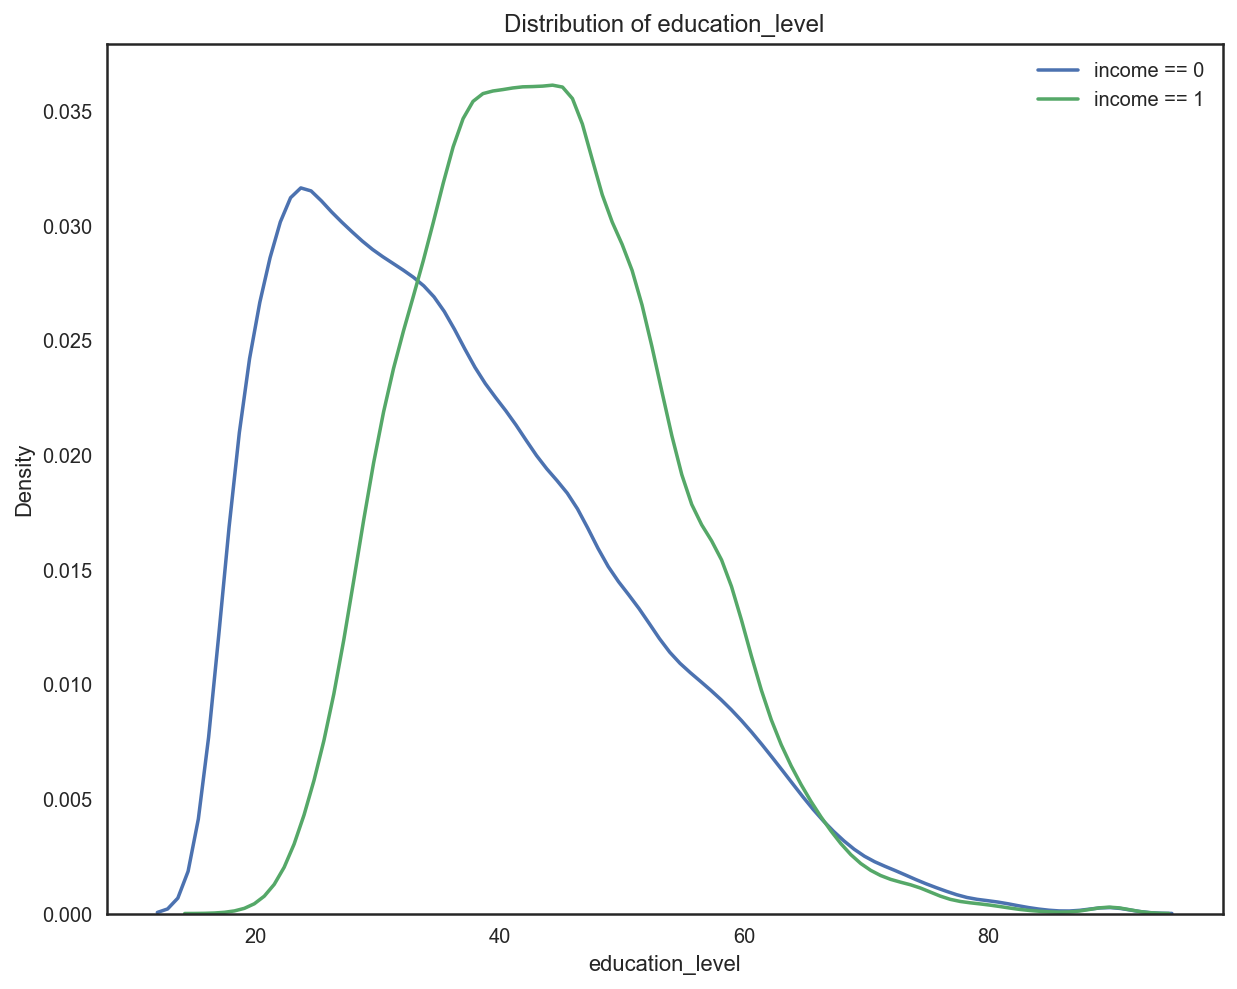

In [53]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data.loc[data['income'] == '<=50K', 'age'], label = 'income == 0')
# KDE plot of loans which were not repaid on time
sns.kdeplot(data.loc[data['income'] == '>50K', 'age'], label = 'income == 1')

# Labeling of plot
plt.xlabel('education_level');
plt.ylabel('Density');
plt.title('Distribution of education_level');


## 2.3 feature scale transform

In [54]:
print(numerical)
fdata[numerical] = scaler.fit_transform(fdata[numerical])
# fdata["income"] = fdata["income"].map({"<=50K":0, ">50K":1})
fdata.head()

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,5,9,0.800000,4,0,1,4,1,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,4,9,0.800000,2,3,0,4,1,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,2,11,0.533333,0,5,1,4,1,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,2,1,0.400000,2,5,0,2,1,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,2,9,0.800000,2,9,5,2,0,0.00000,0.0,0.397959,Cuba,<=50K


In [55]:
fdata_bk = fdata.copy()
fdata.describe()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.295177,2.204502,10.313321,0.607897,2.585180,5.969572,1.412697,3.680288,0.675048,0.011014,0.020339,0.407531
std,0.181067,0.958122,3.817014,0.170192,1.500458,4.026400,1.597227,0.832353,0.468362,0.075065,0.092965,0.122526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,2.000000,9.000000,0.533333,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.397959
50%,0.273973,2.000000,11.000000,0.600000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.397959
75%,0.410959,2.000000,12.000000,0.800000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.448980
max,1.000000,6.000000,15.000000,1.000000,6.000000,13.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5,1,'Correlation between features')

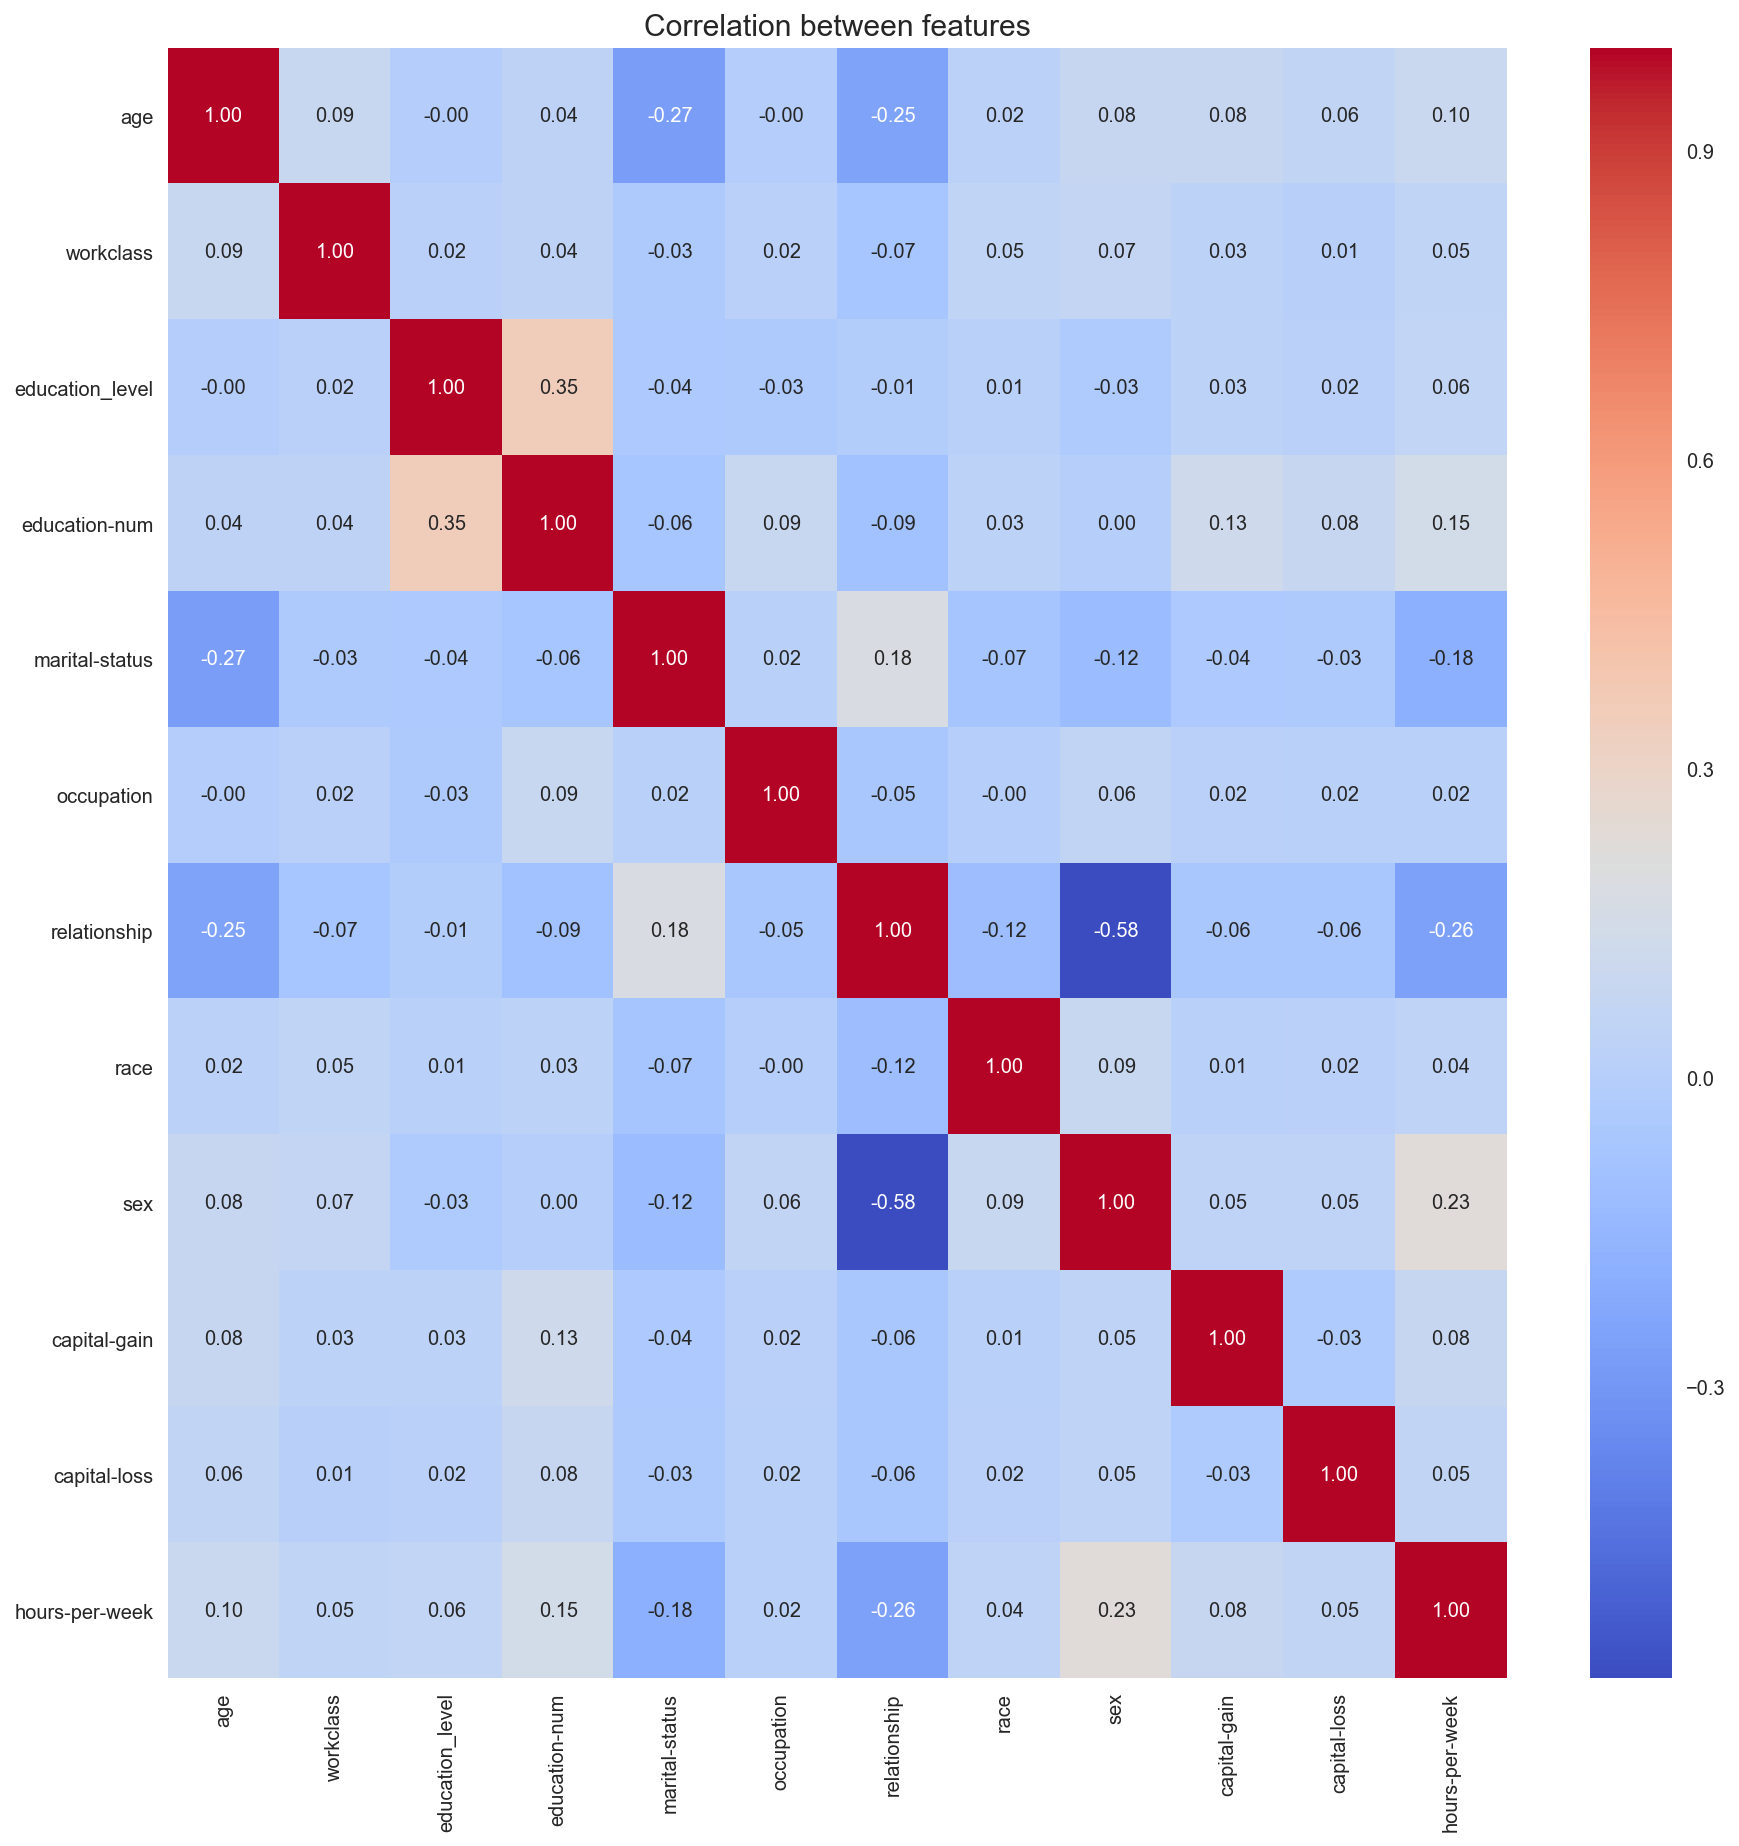

In [56]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
f, ax= plt.subplots(figsize = (15, 15))
g = sns.heatmap(fdata.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax = ax)
# 设置Axes的标题
ax.set_title('Correlation between features', fontsize=15)
# g.set_xticklabels(rotation=30)

# feature engineering xticks exist error 

In [57]:
# g = sns.factorplot(data=fdata, x='education_level', y="income", kind='box', size=10, aspect=.8)
# xticklabels = selfxticklabels('education_level')
# g.set_xticklabels(labels = xticklabels,rotation=30)
# for ax in g.axes.flatten():
#     for tick in ax.get_xticklabels():
#         pass
#         print(tick)
#         tick.set(rotation=30)
# <your code here>
# print('--'*40)
# locs, labels = plt.xticks()
# for i in labels:
#     print(i)

In [58]:
# col = 'race'
# yticklabels = selfyticklabels(col)
# g = sns.factorplot(data=fdata, y=col, x="income", kind='box', size=10, aspect=.8)
# g.set_yticklabels(labels = yticklabels,rotation=30)
# g = sns.factorplot(data=fdata, y=col, x="income", kind='violin', size=10, aspect=.8)
# for ax in g.axes.flatten():
#     for tick in ax.get_yticklabels():
#         # print(tick)
#         pass
# # print(colmap.get(col))
# g.set_yticklabels(labels = yticklabels,rotation=30)

In [59]:
# skipcol = ['hours-per-week', 'capital-gain', 'income', 'capital-loss', 'native-country']
# numerical = ['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
# numerical2 = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass']
# # fdata[numerical] = scaler.fit_transform(fdata[numerical])
# # g = sns.factorplot(x="age",y="income",data=fdata,kind="box")
# for col in fdata.columns:
#     if col not in skipcol:
#         g = sns.factorplot(data=fdata, x=col, y="income", kind='box', size=10, aspect=.8)
#         print('-->'*40)
#         print(col)
#         if col not in numerical2:
#             xticklabels = selfxticklabels(col)
#             g.set_xticklabels(labels = xticklabels,rotation=30)
#         g = sns.factorplot(data = fdata, x=col, y="income", kind="violin", size=10, aspect=.8)
#         if col not in numerical2:
#             xticklabels = selfxticklabels(col)
#             g.set_xticklabels(labels = xticklabels,rotation=30)

In [60]:
# skipcol = ['hours-per-week', 'capital-gain', 'income', 'capital-loss', 'native-country']
# numerical2 = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass']
# g = sns.factorplot(x="age",y="income",data=fdata,kind="box")
# for col in fdata.columns:
#     if col not in skipcol:
#         g = sns.factorplot(data=fdata, y=col, x="income", kind='box', size=10, aspect=.8)
#         print('-->'*40)
#         print(col)
#         if col not in numerical2:
#             yticklabels = selfyticklabels(col)
#             g.set_yticklabels(labels = yticklabels,rotation=30)
#         g = sns.factorplot(data=fdata, y=col, x="income", kind='violin', size=10, aspect=.8)
#         if col not in numerical2:
#             yticklabels = selfyticklabels(col)
#             g.set_yticklabels(labels = yticklabels,rotation=30)

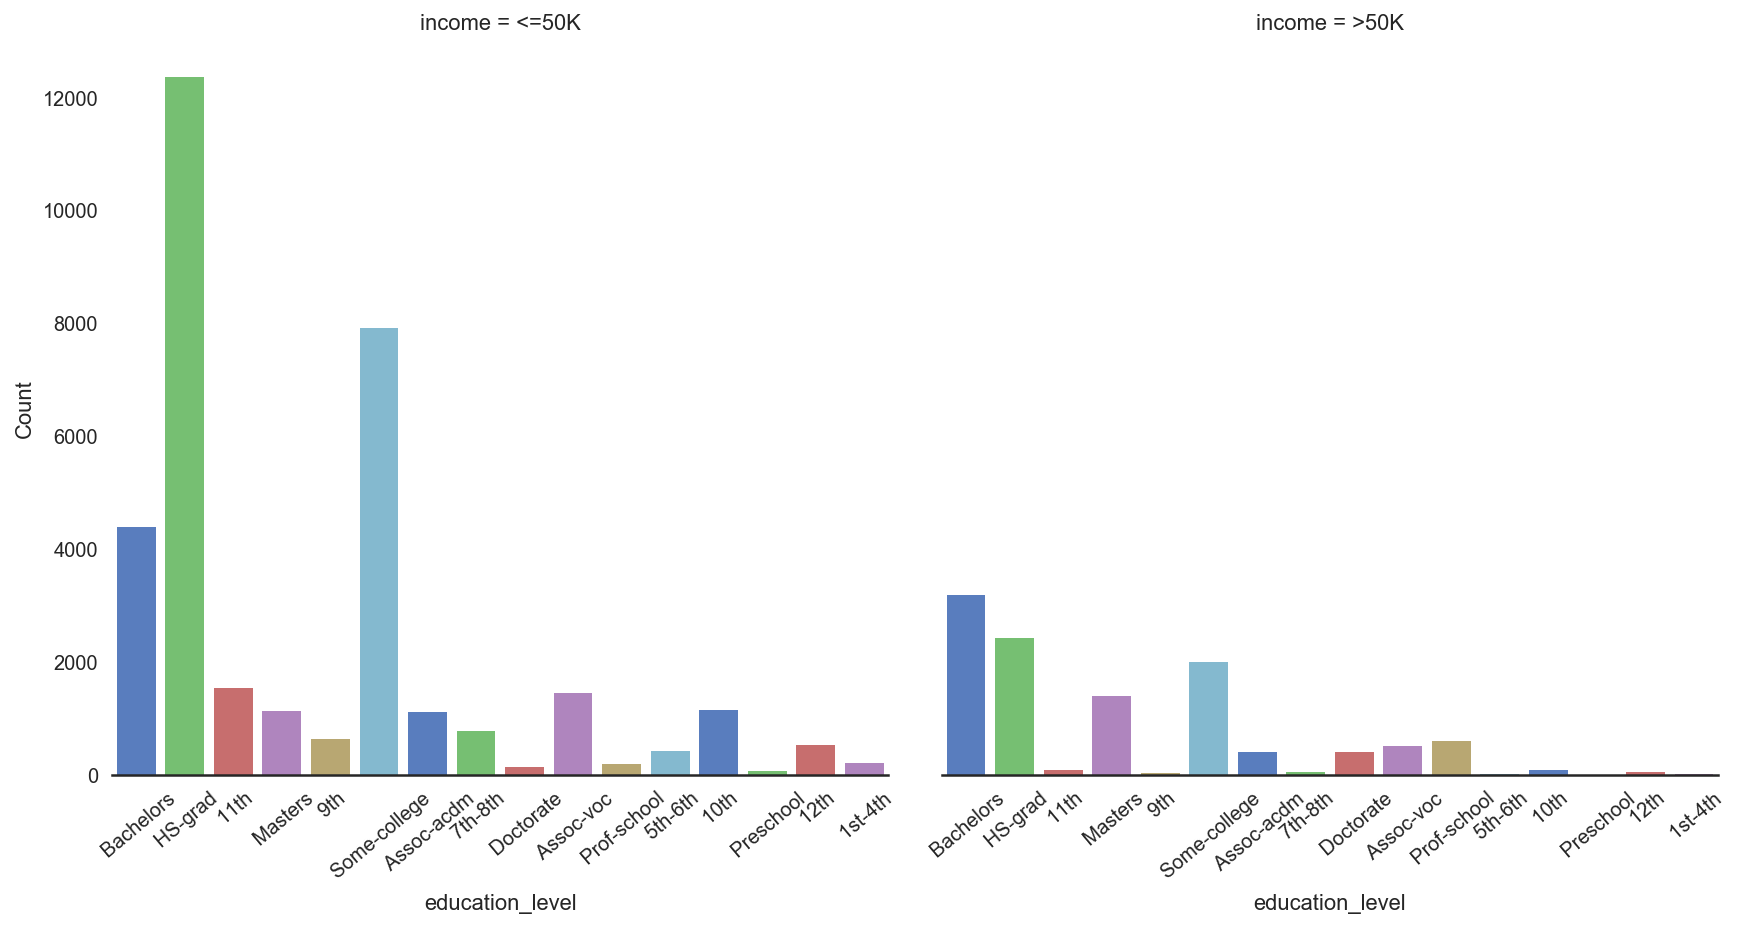

In [61]:
# g = sns.factorplot(data = fdata, kind="count", palette="muted", size=10, aspect=.8)
colname = "education_level"
g = sns.factorplot(colname,
                   col="income",
                   data=data,
                   size=6,
                   kind="count",
                   palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")
# xticklabels = selfxticklabels(colname)
g.set_xticklabels(rotation=40)#labels = xticklabels,

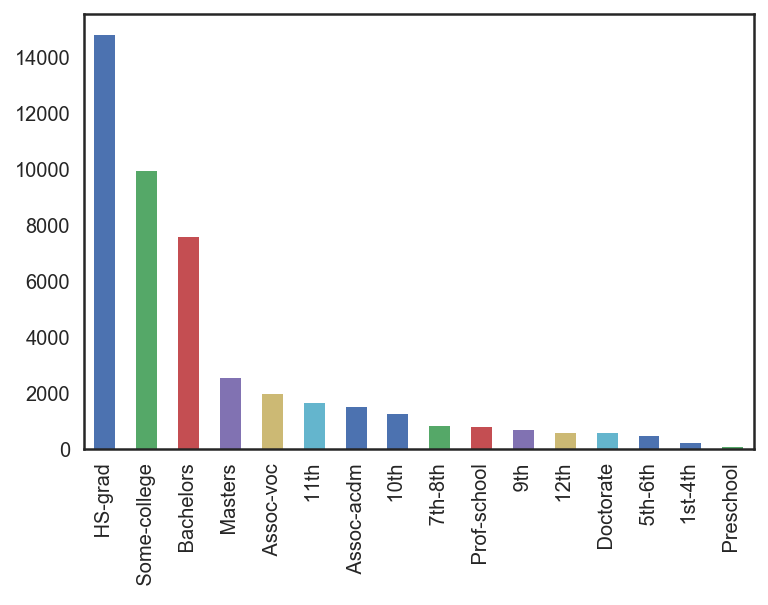

In [62]:
g = data['education_level'].value_counts().plot(kind='bar')

In [63]:
# g = sns.factorplot("education-num", col="income",  data=fdata,
#                    size=6, kind="count", palette="muted")
# g.despine(left=True)
# g = g.set_ylabels("Count")


# 3.1 split dataset

In [64]:
fdata.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,5,9,0.800000,4,0,1,4,1,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,4,9,0.800000,2,3,0,4,1,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,2,11,0.533333,0,5,1,4,1,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,2,1,0.400000,2,5,0,2,1,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,2,9,0.800000,2,9,5,2,0,0.00000,0.0,0.397959,Cuba,<=50K


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,5,9,0.800000,4,0,1,4,1,0.02174,0.0,0.397959,United-States,0
1,0.452055,4,9,0.800000,2,3,0,4,1,0.00000,0.0,0.122449,United-States,0
2,0.287671,2,11,0.533333,0,5,1,4,1,0.00000,0.0,0.397959,United-States,0
3,0.493151,2,1,0.400000,2,5,0,2,1,0.00000,0.0,0.397959,United-States,0
4,0.150685,2,9,0.800000,2,9,5,2,0,0.00000,0.0,0.397959,Cuba,0


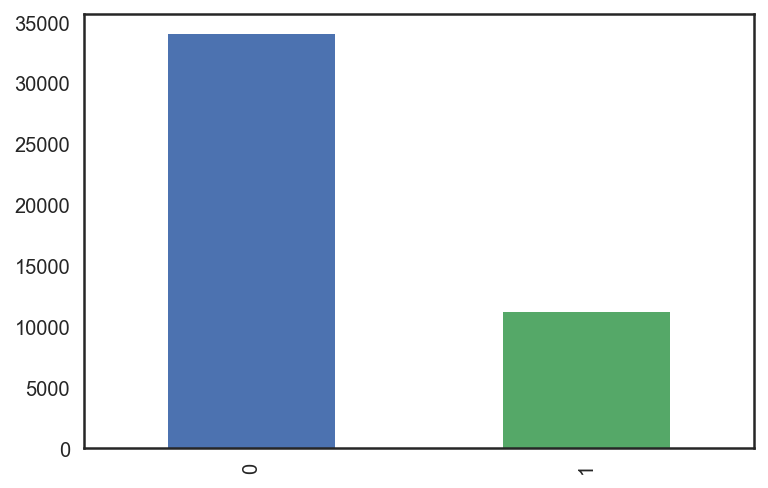

In [65]:
# mapcol(fdata, 'income')
colname='income'
fdata[colname] = fdata[colname].map({'<=50K':0,'>50K':1})
fdata['income'].value_counts().plot(kind='bar')
fdata.head()

In [66]:
# skewed = ['capital-gain', 'capital-loss']
# fdata['capital-loss'].describe()
# 将数据切分成特征和对应的标签
income_raw = fdata['income']
features_raw = fdata.drop(['income','native-country'], axis = 1)
print(income_raw.shape)
print(features_raw.shape)
features_raw.head()

(45222,)
(45222, 12)


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,0.301370,5,9,0.800000,4,0,1,4,1,0.02174,0.0,0.397959
1,0.452055,4,9,0.800000,2,3,0,4,1,0.00000,0.0,0.122449
2,0.287671,2,11,0.533333,0,5,1,4,1,0.00000,0.0,0.397959
3,0.493151,2,1,0.400000,2,5,0,2,1,0.00000,0.0,0.397959
4,0.150685,2,9,0.800000,2,9,5,2,0,0.00000,0.0,0.397959


In [67]:
sample_ID = [i for i in range(features_raw.shape[0])]
feat_ID = pd.DataFrame({'ID':sample_ID})

In [68]:
features_raw_bk = features_raw.copy()
features_raw_bk['ID'] = feat_ID['ID']
income_raw_bk = income_raw.copy()
print("Training set has {} samples.".format(features_raw.shape))
print("Testing set has {} samples.".format(income_raw.shape))

Training set has (45222, 12) samples.
Testing set has (45222,) samples.


In [69]:
features_raw.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,0.301370,5,9,0.800000,4,0,1,4,1,0.02174,0.0,0.397959
1,0.452055,4,9,0.800000,2,3,0,4,1,0.00000,0.0,0.122449
2,0.287671,2,11,0.533333,0,5,1,4,1,0.00000,0.0,0.397959
3,0.493151,2,1,0.400000,2,5,0,2,1,0.00000,0.0,0.397959
4,0.150685,2,9,0.800000,2,9,5,2,0,0.00000,0.0,0.397959


In [70]:
fbkcol = list(features_raw_bk.columns)
fbkcol.remove('ID')
fbkcol

['age',
 'workclass',
 'education_level',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
features_raw = poly.fit_transform(features_raw)
features_raw.shape

(45222, 90)

In [72]:

feat_labels = poly.get_feature_names(input_features = fbkcol)
feat_labels

['age',
 'workclass',
 'education_level',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'age^2',
 'age workclass',
 'age education_level',
 'age education-num',
 'age marital-status',
 'age occupation',
 'age relationship',
 'age race',
 'age sex',
 'age capital-gain',
 'age capital-loss',
 'age hours-per-week',
 'workclass^2',
 'workclass education_level',
 'workclass education-num',
 'workclass marital-status',
 'workclass occupation',
 'workclass relationship',
 'workclass race',
 'workclass sex',
 'workclass capital-gain',
 'workclass capital-loss',
 'workclass hours-per-week',
 'education_level^2',
 'education_level education-num',
 'education_level marital-status',
 'education_level occupation',
 'education_level relationship',
 'education_level race',
 'education_level sex',
 'education_level capital-gain',
 'education_level capital-loss',
 'education_level hours-per-week',
 'education-

In [73]:
# features_raw[:1].size
# features_raw.head()
features_raw = pd.DataFrame(features_raw, columns=feat_labels)

In [74]:
X_train = features_raw
y_train = income_raw

# 3.2  feature select

In [75]:
# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import Lasso          # 此处以L1正则化的线性模型Lasso为例
# lasso = Lasso()                                 # 可在此步对模型进行参数设置，这里用默认值。
# lasso.fit(X_train, y_train)                     # 训练模型，传入X、y, 数据中不能包含miss_value
# sfm = SelectFromModel(prefit=True, estimator=lasso)
# X_train = sfm.transform(X_train)
# # print(X_train.shape)
# # print(X_new.shape)
# # sfm.get_support()
# # Print the names of the most important features
# for feature_list_index in sfm.get_support(indices=True):
#     print(feat_labels[feature_list_index])

In [76]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()                            # default params
rf.fit(X_train, y_train)
sfm = SelectFromModel(prefit=True, estimator=rf)
X_train = sfm.transform(X_train)
# print(X_train.shape)
# print(X_new.shape)
# Print the names of the most important features
feat_import_labels = []
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])
    feat_import_labels.append(feat_labels[feature_list_index])

education-num
relationship
capital-gain
age workclass
age education_level
age education-num
age occupation
age race
age hours-per-week
workclass occupation
workclass hours-per-week
education_level hours-per-week
education-num marital-status
education-num occupation
education-num hours-per-week
marital-status capital-gain
occupation hours-per-week
relationship^2
sex capital-gain
capital-gain^2


In [77]:
# from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import RandomForestClassifier      # 同样以此模型举例
# forest = RandomForestClassifier()                            # 默认参数
# forest.fit(X_train, y_train)
# model = SelectFromModel(prefit=True, estimator=forest)
# X_train = model.transform(X_train)
# importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# # print("Feature ranking:")
# # for f in range(X_train.shape[1]):
# #     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# fig = plt.figure(figsize=(20,15))
# plt.title("Feature importances")
# plt.bar(range(X_train.shape[1]),
#         importances[indices],
#         color="g",
#         yerr=std[indices],
#         align="center")
# # plt.xticks(range(X_train.shape[1]), X_train.columns[indices][:], rotation=60)
# plt.xlim([-1, X_train.shape[1]])
# plt.show()

In [78]:
# Create a dataframe of the features 
poly_topk_features = pd.DataFrame(X_train, columns = feat_import_labels)
# Add in the target
poly_topk_features_corr = poly_topk_features.copy()
poly_topk_features_corr['income'] = y_train

# Find the correlations with the target
poly_corrs = poly_topk_features_corr.corr()['income'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))
poly_topk_features.head()

relationship                   -0.253402
relationship^2                 -0.135783
education-num marital-status   -0.046213
workclass occupation            0.055510
workclass hours-per-week        0.132236
occupation hours-per-week       0.138144
capital-gain^2                  0.138905
age workclass                   0.172026
education-num occupation        0.174429
age occupation                  0.184172
Name: income, dtype: float64
age hours-per-week              0.308844
education-num                   0.332800
age education-num               0.369426
education-num hours-per-week    0.373123
income                          1.000000
Name: income, dtype: float64


,education-num,relationship,capital-gain,age workclass,age education_level,age education-num,age occupation,age race,age hours-per-week,workclass occupation,workclass hours-per-week,education_level hours-per-week,education-num marital-status,education-num occupation,education-num hours-per-week,marital-status capital-gain,occupation hours-per-week,relationship^2,sex capital-gain,capital-gain^2
0,0.800000,1.0,0.02174,1.506849,2.712329,0.241096,0.000000,1.205479,0.119933,0.0,1.989796,3.581633,3.2,0.000000,0.318367,0.086961,0.000000,1.0,0.02174,0.000473
1,0.800000,0.0,0.00000,1.808219,4.068493,0.361644,1.356164,1.808219,0.055354,12.0,0.489796,1.102041,1.6,2.400000,0.097959,0.000000,0.367347,0.0,0.00000,0.000000
2,0.533333,1.0,0.00000,0.575342,3.164384,0.153425,1.438356,1.150685,0.114481,10.0,0.795918,4.377551,0.0,2.666667,0.212245,0.000000,1.989796,1.0,0.00000,0.000000
3,0.400000,0.0,0.00000,0.986301,0.493151,0.197260,2.465753,0.986301,0.196254,10.0,0.795918,0.397959,0.8,2.000000,0.159184,0.000000,1.989796,0.0,0.00000,0.000000
4,0.800000,5.0,0.00000,0.301370,1.356164,0.120548,1.356164,0.301370,0.059966,18.0,0.795918,3.581633,1.6,7.200000,0.318367,0.000000,3.581633,25.0,0.00000,0.000000


In [79]:
# Merge polynomial features into training dataframe
poly_topk_features['ID'] = features_raw_bk['ID']
X_train = features_raw_bk.merge(poly_topk_features, on = 'ID', how = 'left')
X_train.head()

,age,workclass,education_level,education-num_x,marital-status,occupation,relationship_x,race,sex,capital-gain_x,...,workclass hours-per-week,education_level hours-per-week,education-num marital-status,education-num occupation,education-num hours-per-week,marital-status capital-gain,occupation hours-per-week,relationship^2,sex capital-gain,capital-gain^2
0,0.301370,5,9,0.800000,4,0,1,4,1,0.02174,...,1.989796,3.581633,3.2,0.000000,0.318367,0.086961,0.000000,1.0,0.02174,0.000473
1,0.452055,4,9,0.800000,2,3,0,4,1,0.00000,...,0.489796,1.102041,1.6,2.400000,0.097959,0.000000,0.367347,0.0,0.00000,0.000000
2,0.287671,2,11,0.533333,0,5,1,4,1,0.00000,...,0.795918,4.377551,0.0,2.666667,0.212245,0.000000,1.989796,1.0,0.00000,0.000000
3,0.493151,2,1,0.400000,2,5,0,2,1,0.00000,...,0.795918,0.397959,0.8,2.000000,0.159184,0.000000,1.989796,0.0,0.00000,0.000000
4,0.150685,2,9,0.800000,2,9,5,2,0,0.00000,...,0.795918,3.581633,1.6,7.200000,0.318367,0.000000,3.581633,25.0,0.00000,0.000000


In [80]:
X_colname = X_train.columns

In [81]:
# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')
X_train = imputer.fit_transform(X_train)

In [82]:
X_train = pd.DataFrame(X_train, columns=X_colname)
X_train.head()

,age,workclass,education_level,education-num_x,marital-status,occupation,relationship_x,race,sex,capital-gain_x,...,workclass hours-per-week,education_level hours-per-week,education-num marital-status,education-num occupation,education-num hours-per-week,marital-status capital-gain,occupation hours-per-week,relationship^2,sex capital-gain,capital-gain^2
0,0.301370,5.0,9.0,0.800000,4.0,0.0,1.0,4.0,1.0,0.02174,...,1.989796,3.581633,3.2,0.000000,0.318367,0.086961,0.000000,1.0,0.02174,0.000473
1,0.452055,4.0,9.0,0.800000,2.0,3.0,0.0,4.0,1.0,0.00000,...,0.489796,1.102041,1.6,2.400000,0.097959,0.000000,0.367347,0.0,0.00000,0.000000
2,0.287671,2.0,11.0,0.533333,0.0,5.0,1.0,4.0,1.0,0.00000,...,0.795918,4.377551,0.0,2.666667,0.212245,0.000000,1.989796,1.0,0.00000,0.000000
3,0.493151,2.0,1.0,0.400000,2.0,5.0,0.0,2.0,1.0,0.00000,...,0.795918,0.397959,0.8,2.000000,0.159184,0.000000,1.989796,0.0,0.00000,0.000000
4,0.150685,2.0,9.0,0.800000,2.0,9.0,5.0,2.0,0.0,0.00000,...,0.795918,3.581633,1.6,7.200000,0.318367,0.000000,3.581633,25.0,0.00000,0.000000


In [83]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split
# 将'features'和'income'数据切分成训练集和测试集
X_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 2)
# 显示切分的结果
print("Training set has {} samples.".format(X_train.shape))
print("Testing set has {} samples.".format(y_train.shape))
print("Training set has {} samples.".format(x_val.shape))
print("Testing set has {} samples.".format(y_val.shape))
print("Training set has {} samples.".format(x_test.shape))
print("Testing set has {} samples.".format(y_test.shape))

Training set has (27132, 33) samples.
Testing set has (27132,) samples.
Training set has (9045, 33) samples.
Testing set has (9045,) samples.
Training set has (9045, 33) samples.
Testing set has (9045,) samples.


In [84]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
import time

In [85]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5, shuffle=True)

In [86]:
# Modeling step Test differents algorithms 
random_state = 3
classifiers = []
classifiers.append(xgb.sklearn.XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=5, n_jobs=4, random_state=random_state))
classifiers.append(GaussianNB())
classifiers.append(BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=random_state+1), random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())
# classifiers.append(GaussianProcessClassifier(random_state=random_state))
classifiers.append(RidgeClassifier(random_state=random_state))
classifiers.append(SGDClassifier(random_state=random_state))
# classifiers.append(RadiusNeighborsClassifier())
classifiers.append(ExtraTreeClassifier(random_state=random_state))

cv_results = []
train_times = []
for classifier in classifiers :
    before_cv = time.time()
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=16))
    train_times.append(time.time() - before_cv)
    print('classifier:', classifier)

classifier: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=3,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
classifier: GaussianNB(priors=None)
classifier: BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=3, verbos

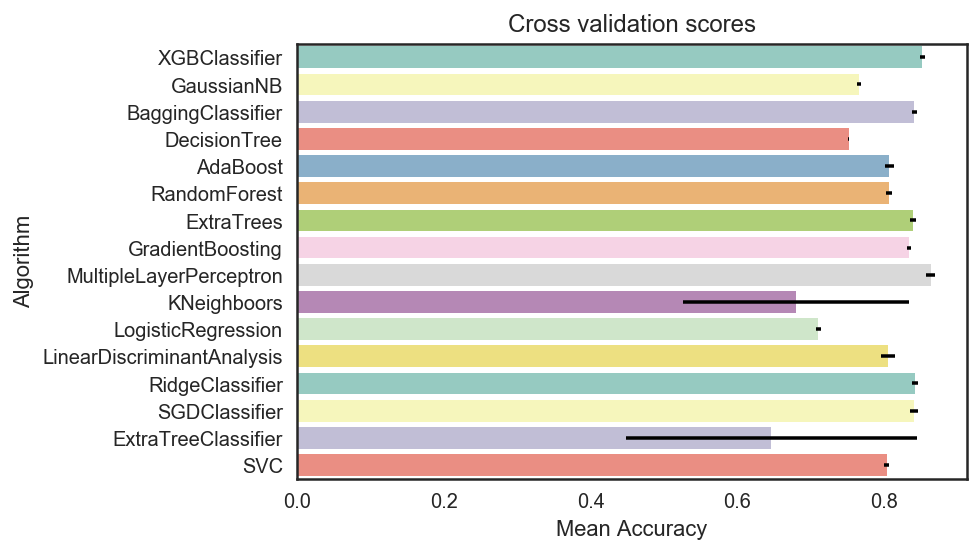

In [87]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,
                       "CrossValerrors": cv_std,
                       "Algorithm":["XGBClassifier",
                                    "GaussianNB",
                                    "BaggingClassifier",
                                    "DecisionTree",
                                    "AdaBoost",
                                    "RandomForest",
                                    "ExtraTrees",
                                    "GradientBoosting",
                                    "MultipleLayerPerceptron",
                                    "KNeighboors",
                                    "LogisticRegression",
                                    "LinearDiscriminantAnalysis",
                                    "RidgeClassifier",
                                    "SGDClassifier",
                                    "ExtraTreeClassifier",
                                    "SVC"
                                   ],
                       "train_times":train_times
                      })

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [88]:
cv_res

,Algorithm,CrossValMeans,CrossValerrors,train_times
0,XGBClassifier,0.851872,0.003399,6.205412
1,GaussianNB,0.765627,0.002699,3.439806
2,BaggingClassifier,0.840889,0.003659,5.518950
3,DecisionTree,0.751622,0.000570,269.706566
4,AdaBoost,0.806980,0.006511,3.654010
5,RandomForest,0.805949,0.004220,3.656412
6,ExtraTrees,0.839231,0.004461,3.621160
7,GradientBoosting,0.833997,0.002410,3.659974
8,MultipleLayerPerceptron,0.863002,0.005719,6.852629
9,KNeighboors,0.679929,0.153925,3.907941


In [89]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=100,
    max_depth=8,
    min_child_weight=1,
    gamma=0.4,
    subsample=0.75,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    n_jobs=-1,
    scale_pos_weight=1,
    seed=50)

xgb_param_grid = {
    'subsample':[0.9],
    'colsample_bytree':[0.5]
}
#  'learning_rate':[0.0001, 0.001, 0.01, 0.1]
grid_search=GridSearchCV(estimator=xgb,
                               param_grid=xgb_param_grid,
                               scoring='accuracy',
                               cv=kfold,
                               verbose=1,
                               n_jobs=4)
grid_result = grid_search.fit(X_train, y_train)
xgb_best = grid_search.best_estimator_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    6.2s finished


Best: 0.867242 using {'colsample_bytree': 0.5, 'subsample': 0.9}


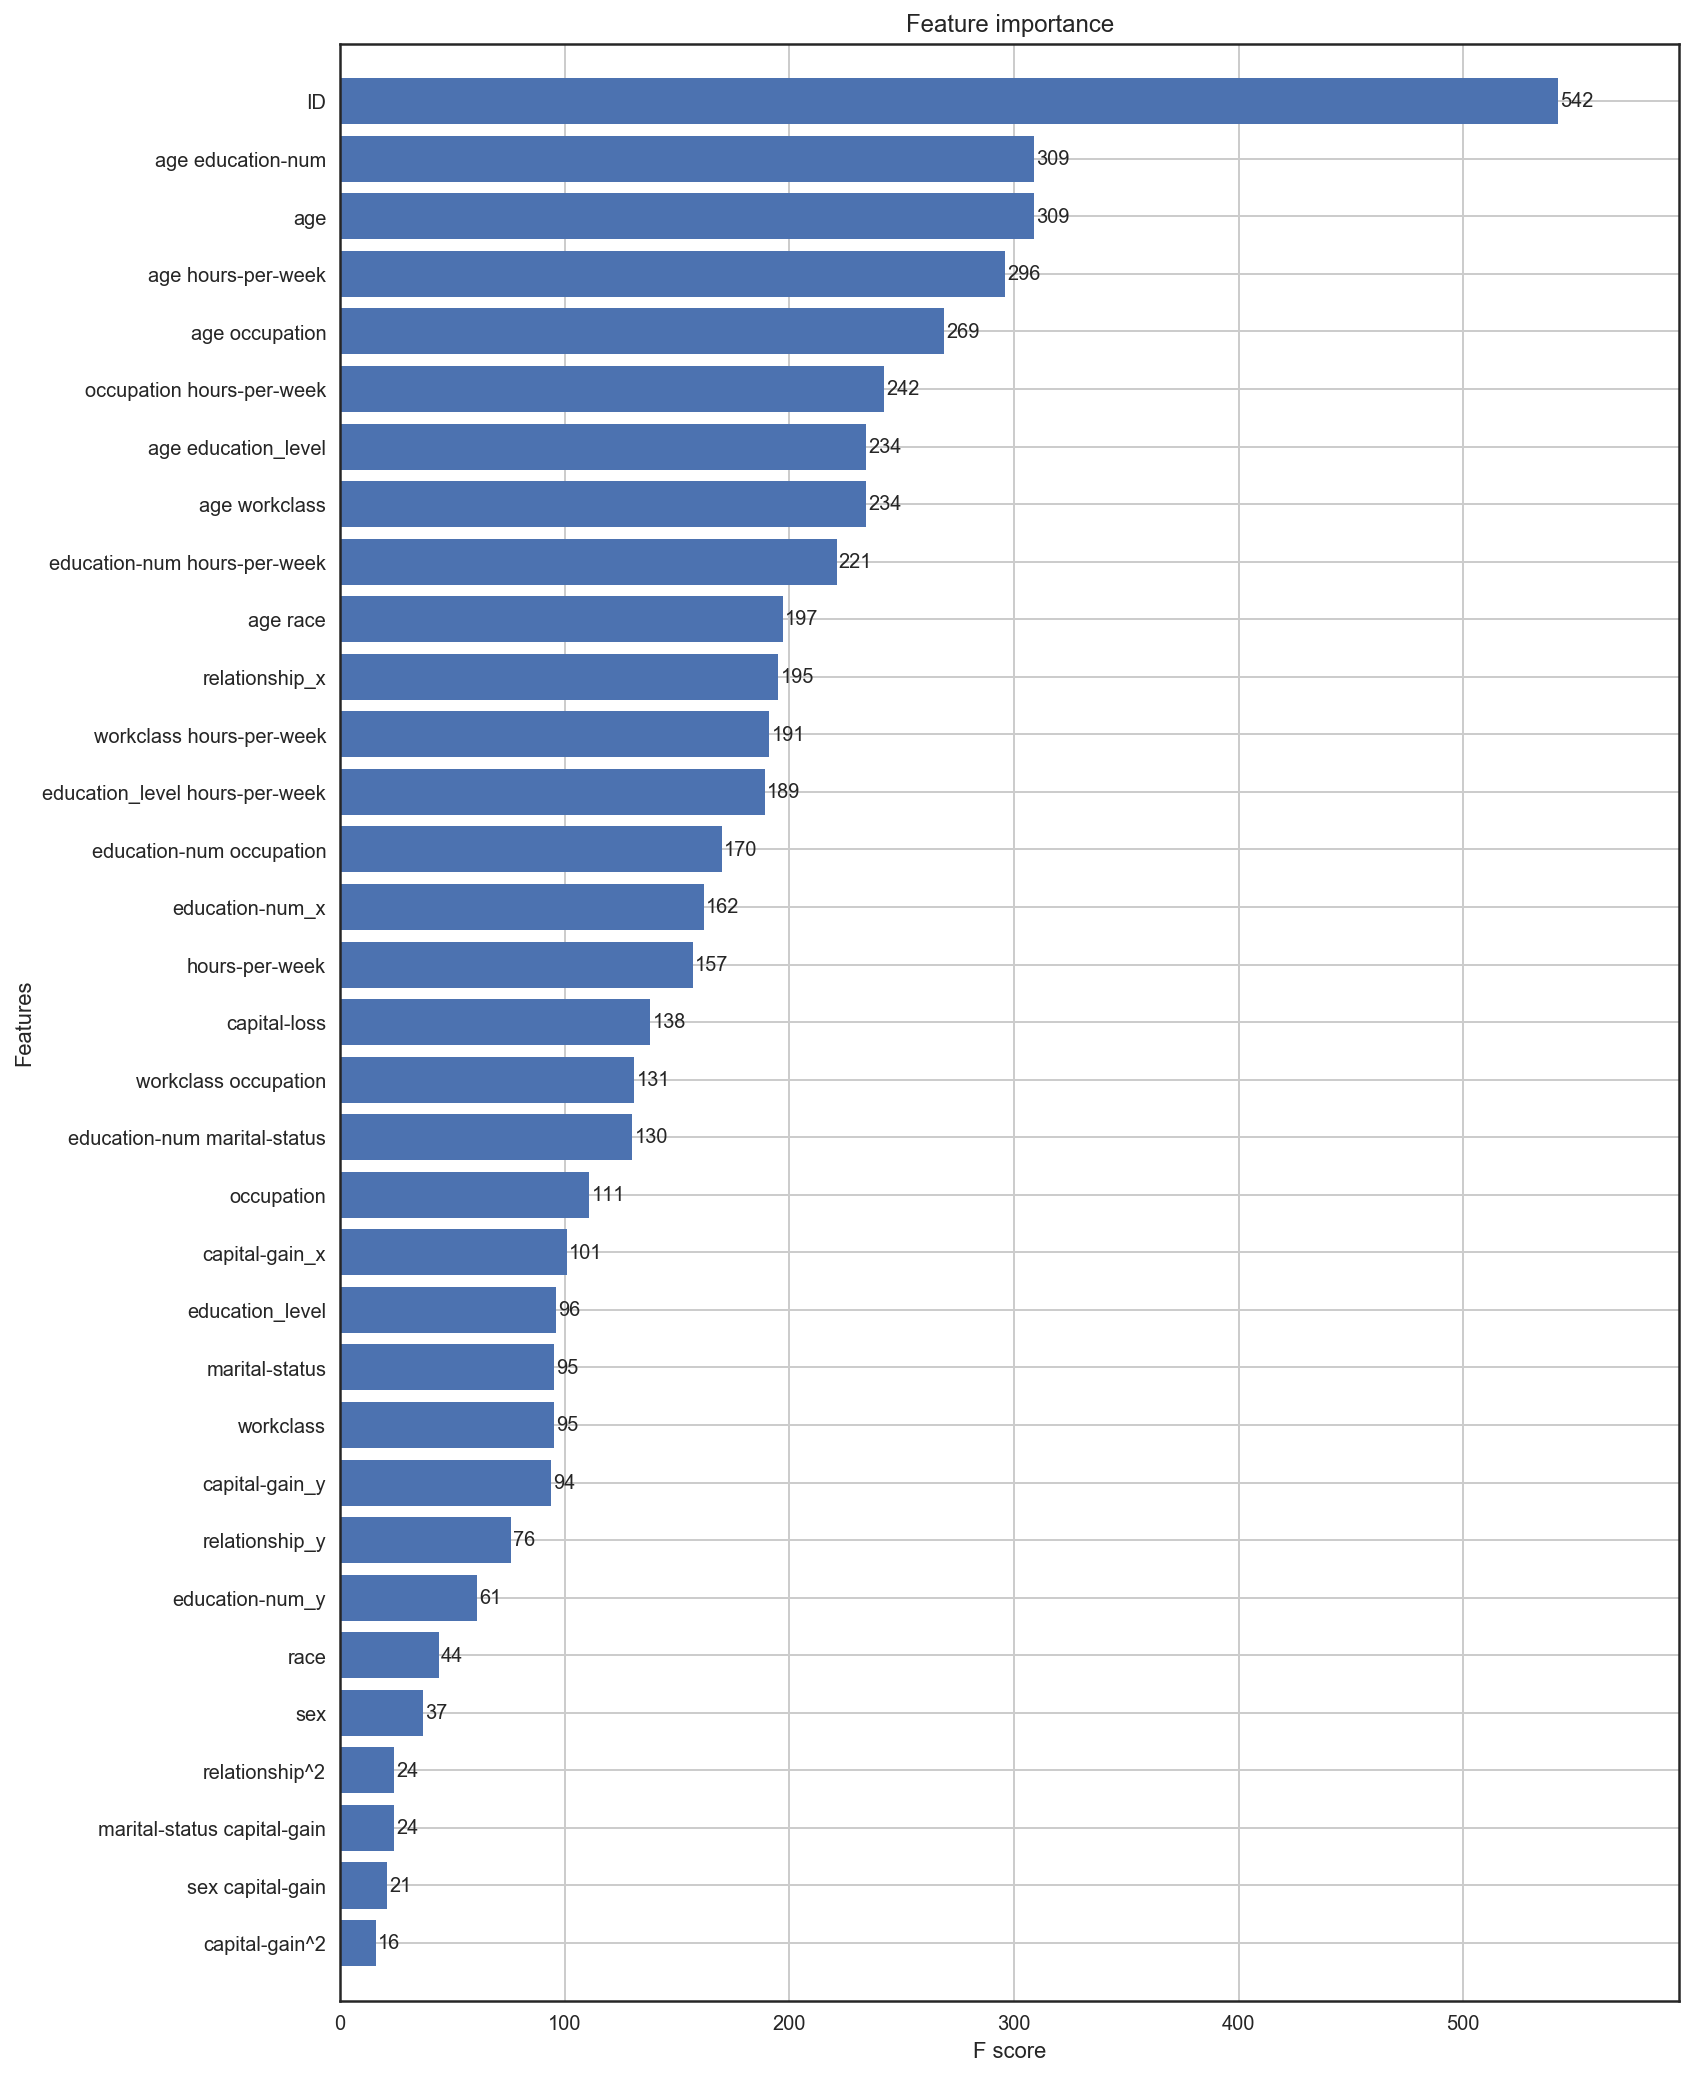

In [90]:
import xgboost
from sklearn.metrics import r2_score

# Thanks to anokas for this #
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)


dtrain = xgboost.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
xgbmodel = xgboost.train(dict(grid_result.best_params_, silent=0), dtrain, num_boost_round=100, feval=r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgboost.plot_importance(xgbmodel, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [101]:
# form DMatrices for Xgboost training
dval = xgboost.DMatrix(x_val, y_val)

# xgboost, cross-validation
cv_result = xgboost.cv(dict(grid_result.best_params_, silent=0),
                       dval,
                       num_boost_round=500, # increase to have better results (~700)
                       early_stopping_rounds=50,
                       verbose_eval=50,
                       show_stdv=False
                  )
# print(cv_result.shape)
cv_result.head()

[0]	train-rmse:0.418427	test-rmse:0.421851
[50]	train-rmse:0.213884	test-rmse:0.326964


,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
0,0.421851,0.000442,0.418427,0.000344
1,0.376027,0.000409,0.369633,0.000874
2,0.351974,0.000522,0.340457,0.000852
3,0.338491,0.001112,0.323424,0.001027
4,0.330686,0.001499,0.312773,0.000471


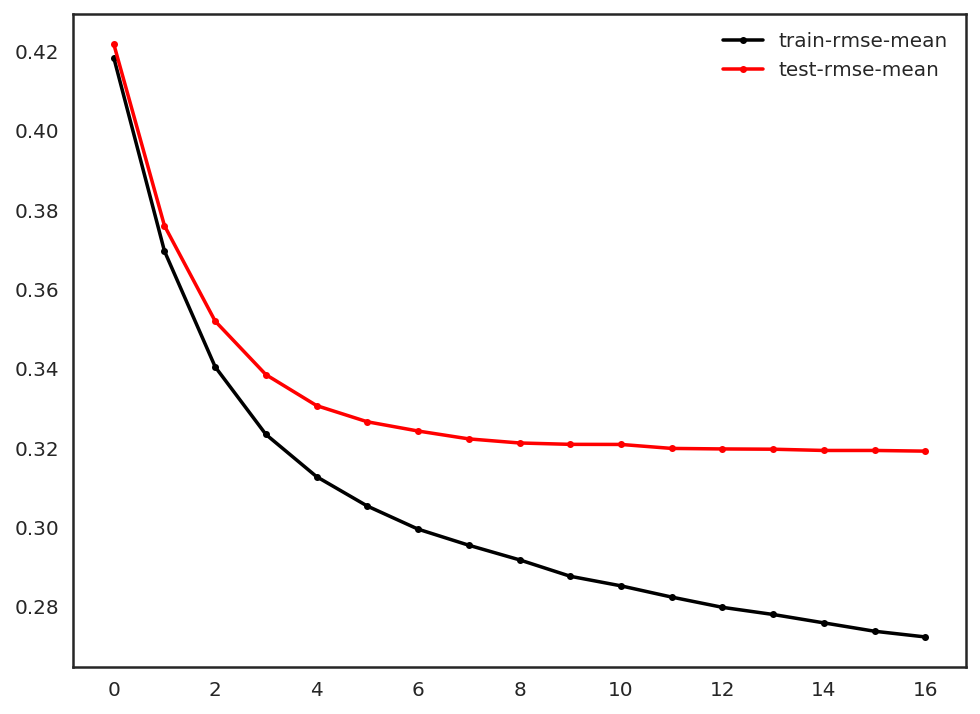

In [106]:
# plot the important features #
x_num = list(range(len(cv_result)))
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(x_num, cv_result['train-rmse-mean'], color='k',marker='.', label='train-rmse-mean')
plt.plot(x_num, cv_result['test-rmse-mean'], color='r',marker='.', label='test-rmse-mean')
plt.legend()
plt.show()

In [91]:
# now fixed, correct calculation
print(r2_score(dtrain.get_label(), xgbmodel.predict(dtrain)))

0.6709970276179278


In [ ]:
# gaussianNB = GaussianNB()
# gaussianNB_param_grid = {}

# grid_search = GridSearchCV(gaussianNB, param_grid = gaussianNB_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
# grid_result = grid_search.fit(X_train,y_train)
# gaussianNB_best = grid_search.best_estimator_
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# print(dt_best.feature_importances_)

In [91]:
# BaggingClassifier
bagdt = DecisionTreeClassifier()

bagdtClassfier = BaggingClassifier(bagdt, random_state=9)
bag_param = {'base_estimator__criterion':['gini'],
                  'base_estimator__splitter':['best'],
                  'base_estimator__max_depth':[10],
                  'n_estimators':[2]}

grid_search = GridSearchCV(bagdtClassfier, param_grid = bag_param, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_result = grid_search.fit(X_train,y_train)
bagdt_best = grid_search.best_estimator_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.1s finished


Best: 0.843838 using {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 10, 'base_estimator__splitter': 'best', 'n_estimators': 2}


In [92]:
# BaggingClassifier
bagrf = RandomForestClassifier(n_jobs=6)
bagrfClassfier = BaggingClassifier(bagrf, random_state=9)
# bagrf_param = {'base_estimator__max_features':['sqrt', 'log2',None],
#                'base_estimator__min_samples_leaf':[1,2,5],
#                'base_estimator__min_samples_split':[2,5],
#                'base_estimator__max_depth':[5,15],
#                'n_estimators':[250],
#                'max_features':[0.6],
#                'max_samples':[0.6]
#               }
bagrf_param = {'base_estimator__max_features':[None],
               'base_estimator__min_samples_leaf':[2],
               'base_estimator__min_samples_split':[2],
               'base_estimator__max_depth':[15],
               'n_estimators':[250],
               'max_features':[0.6],
               'max_samples':[0.6]
              }

grid_search = GridSearchCV(bagrfClassfier, param_grid = bagrf_param, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_result = grid_search.fit(X_train,y_train)
bagrf_best = grid_search.best_estimator_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  4.4min finished


Best: 0.858027 using {'base_estimator__max_depth': 15, 'base_estimator__max_features': None, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 2, 'max_features': 0.6, 'max_samples': 0.6, 'n_estimators': 250}


In [93]:
# # DecisionTreeClassifier
# dtc = DecisionTreeClassifier(max_features='auto')

# # baggingDTC = BaggingClassifier(DTC3, random_state=10)
# # 'criterion':['gini','entropy'],
# # 'splitter':['best','random']

# dt_param_grid = {'criterion':['entropy'],
#                   'splitter':['best']}

# grid_search = GridSearchCV(dtc, param_grid = dt_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
# grid_result = grid_search.fit(X_train,y_train)
# dt_best = grid_search.best_estimator_
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# # print(dt_best.feature_importances_)

In [94]:
### DecisionTreeClassifier + AdaBoostClassifier
adadt = DecisionTreeClassifier()

adadtClassifier = AdaBoostClassifier(adadt, random_state=7)
# "base_estimator__criterion" : ["gini", "entropy"],
# "base_estimator__splitter" :   ["best", "random"],
# "algorithm" : ["SAMME","SAMME.R"],
# "learning_rate":  [0.0001, 0.001, 0.01, 0.1]
    
ada_param_grid = {"base_estimator__criterion":["entropy"],
                  "base_estimator__splitter":["best"],
                  "algorithm" : ["SAMME.R"],
                  "n_estimators" :[2],
                  "learning_rate":  [0.1]}

grid_search = GridSearchCV(adadtClassifier,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_result = grid_search.fit(X_train,y_train)
ada_best = grid_search.best_estimator_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.2s finished


Best: 0.807423 using {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'learning_rate': 0.1, 'n_estimators': 2}


In [95]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()
# "max_features": [1, 3, 10],
# "n_estimators" :[100,300],
# "min_samples_split": [2, 3, 10],
# "n_estimators" :[100,300],
# "min_samples_leaf": [1, 3, 10],
## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [3],
              "min_samples_split": [3],
              "min_samples_leaf": [10],
              "bootstrap": [False],
              "n_estimators" :[300],
              "criterion": ["gini"]}


grid_search = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_result = grid_search.fit(X_train,y_train)
RFC_best = grid_search.best_estimator_

# Best score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   18.5s finished


Best: 0.858654 using {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 300}


In [96]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()
# "max_depth": [None],
# "max_features": [1, 3, 10],
# "min_samples_split": [2, 3, 10],
# "min_samples_leaf": [1, 3, 10],
# "bootstrap": [False],
# "n_estimators" :[100,300],
# "criterion": ["gini", "entropy"]
## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [10],
              "min_samples_split": [2],
              "min_samples_leaf": [10],
              "bootstrap": [False],
              "n_estimators" :[300],
              "criterion": ["entropy"]}


grid_search = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_result = grid_search.fit(X_train,y_train)
ExtC_best = grid_search.best_estimator_

# Best score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   18.8s finished


Best: 0.854895 using {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [97]:
# Gradient boosting tunning
# 'loss' : ["deviance","exponential"],
# 'n_estimators' : [100,200,300],
# 'learning_rate': [0.1],
# 'max_depth': [4, 8],
# 'min_samples_leaf': [100,150],
# 'max_features': [0.3, 0.1] 
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [200],
              'learning_rate': [0.1],
              'max_depth': [8],
              'min_samples_leaf': [100],
              'max_features': [0.3] 
              }

grid_search = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_result = grid_search.fit(X_train,y_train)
GBC_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   12.1s finished


Best: 0.865436 using {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 200}


In [98]:
# Creating a MLP model
mlpc = MLPClassifier() # Creating a MLP to optimise
# param_grid = [{'activation':['relu']},
#               {'solver':['lbfgs','sgd','adam']},
#               {'hidden_layer_sizes':[(5),(5,5),(10,10)]}]
param_grid = [{'activation':['relu']},
              {'solver':['adam']},
              {'hidden_layer_sizes':[(5),(5,5),(10,10)]}]

# Setting up the grid search with model, parameter and scoring method
grid_search = GridSearchCV(estimator=mlpc,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=4,
                           verbose=1,
                           scoring='accuracy')

grid_result = grid_search.fit(X_train,y_train)
mlp_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    6.9s finished


Best: 0.750332 using {'hidden_layer_sizes': (10, 10)}


In [99]:
# # KNeighboors
# knnc = KNeighborsClassifier()
# # param_grid = [{'n_neighbors':[2, 4, 8, 16],
# #                'p':[2,3]
# #               }]
# param_grid = [{'n_neighbors':[16],
#                'p':[2]
#               }]

# # Setting up the grid search with model, parameter and scoring method
# grid_search = GridSearchCV(estimator=knnc,
#                            param_grid=param_grid,
#                            cv=kfold,
#                            n_jobs=4,
#                            verbose=1,
#                            scoring='accuracy')

# grid_result = grid_search.fit(X_train,y_train)
# knn_best = grid_search.best_estimator_

# # Print the best score and the best parameters
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [100]:
# KNeighboors
lr = LogisticRegression()
# param_grid = [{'penalty':['l1','l2'],
#                'C':[0.001,0.01,0.1,1]
#               }]
param_grid = [{'penalty':['l1'],
               'C':[1]
              }]

# Setting up the grid search with model, parameter and scoring method
grid_search = GridSearchCV(estimator=lr,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=4,
                           verbose=1,
                           scoring='accuracy')

grid_result = grid_search.fit(X_train,y_train)
lr_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    4.2s finished


Best: 0.841626 using {'C': 1, 'penalty': 'l1'}


In [101]:
# KNeighboors
lda = LinearDiscriminantAnalysis()
# {'solver':['svd','lsqr','eigen']
param_grid = [{'solver':['svd']
              }]

# Setting up the grid search with model, parameter and scoring method
grid_search = GridSearchCV(estimator=lda,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=4,
                           verbose=1,
                           scoring='accuracy')

grid_result = grid_search.fit(X_train,y_train)
lda_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.3s finished


Best: 0.841884 using {'solver': 'svd'}


In [102]:
# KNeighboors
rc = RidgeClassifier()
# param_grid = [{'alpha':[0.001,0.01,0.1,1,10],
#                'fit_intercept':[True, False],
#                'normalize':[True, False],
#               }]
param_grid = [{'alpha':[0.001],
               'fit_intercept':[True],
               'normalize':[True],
              }]

# Setting up the grid search with model, parameter and scoring method
grid_search = GridSearchCV(estimator=rc,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=4,
                           verbose=1,
                           scoring='accuracy')

grid_result = grid_search.fit(X_train,y_train)
rc_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: 0.840262 using {'alpha': 0.001, 'fit_intercept': True, 'normalize': True}


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.3s finished


In [103]:
# KNeighboors
sgdc = SGDClassifier(loss='log')
# param_grid = [{'n_neighbors':[2, 4, 8, 16],
#                'p':[2,3],
#                'fit_intercept':[True, False],
#                'learning_rate':[True, False],
#               }]
param_grid = [{'alpha':[0.001],
               'penalty':['l1']
              }]

# Setting up the grid search with model, parameter and scoring method
grid_search = GridSearchCV(estimator=sgdc,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=4,
                           verbose=1,
                           scoring='accuracy')

grid_result = grid_search.fit(X_train,y_train)
sgdc_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: 0.646395 using {'alpha': 0.001, 'penalty': 'l1'}


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    2.0s finished


In [104]:
# KNeighboors
etc = ExtraTreeClassifier()
print(etc.get_params().keys())
# param_grid = [{'max_features':['sqrt', 'log2',None],
#                'min_samples_leaf':[1,2,5],
#                'min_samples_split':[2,5],
#                'max_depth':[5,15]
#               }]
param_grid = [{'max_features':[None],
               'min_samples_leaf':[4],
               'min_samples_split':[3],
               'max_depth':[15]
              }]

# Setting up the grid search with model, parameter and scoring method
grid_search = GridSearchCV(estimator=etc,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=4,
                           verbose=1,
                           scoring='accuracy')

grid_result = grid_search.fit(X_train,y_train)
etc_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: 0.842511 using {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 3}


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.9s finished


In [105]:
# ### SVC classifier
# SVMC = SVC(probability=True,kernel='rbf',random_state=9)#
# # 'gamma': [0.01, 0.1, 1],
# # 'C': [1, 10]
# # 'kernel': ['linear', 'rbf', 'sigmoid']
# # svc_param_grid = {'kernel': ['rbf']}
# # grid_search = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
# # grid_result = grid_search.fit(X_train,y_train)
# # SVMC_best = grid_search.best_estimator_
# # print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# SVMC.fit(X_train,y_train)
# score = SVMC.score(x_val,y_val)
# print(score)
# SVMC_best = SVMC

# LGBMClassifier

In [106]:
def auc2(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict(train)),
                            metrics.roc_auc_score(y_test,m.predict(test)))

In [108]:
import lightgbm as lgb
from sklearn import metrics

lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [5],
              "learning_rate" : [0.05],
              "num_leaves": [900],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=4, param_grid=param_dist, cv = kfold, scoring="roc_auc", verbose=5)
grid_result = grid_search.fit(X_train, y_train)
lgm_best = grid_search.best_estimator_
# Best score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    3.9s remaining:    5.9s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.1s finished


Best: 0.925166 using {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 900}


In [109]:
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(x_val, y_val, reference=lgb_train)
params = {
    'max_depth': 5,
    'boosting_type': 'dart',
    'objective': 'binary',
    'num_class': 1,  
    'metric': 'auc',
    'num_leaves': 900,  
    'min_data_in_leaf': 100,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.4,
    'lambda_l2': 0.5,
    'min_gain_to_split': 0.2,
    'verbose': 5,
    'n_estimators': 300,
    'is_unbalance': True
}
# Without Categorical Features
gbm = lgb.train(params,
                   lgb_train,
                   num_boost_round=100,
                   valid_sets=lgb_eval,
                   early_stopping_rounds=50)
preds = gbm.predict(x_test, num_iteration=gbm.best_iteration)  # 输出的是概率结果 

[1]	valid_0's auc: 0.888878
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.891133
[3]	valid_0's auc: 0.891387
[4]	valid_0's auc: 0.893158
[5]	valid_0's auc: 0.893417
[6]	valid_0's auc: 0.894354
[7]	valid_0's auc: 0.895539
[8]	valid_0's auc: 0.895664
[9]	valid_0's auc: 0.896324
[10]	valid_0's auc: 0.897143
[11]	valid_0's auc: 0.897081
[12]	valid_0's auc: 0.897472
[13]	valid_0's auc: 0.897798
[14]	valid_0's auc: 0.89753
[15]	valid_0's auc: 0.897773
[16]	valid_0's auc: 0.898235
[17]	valid_0's auc: 0.898748
[18]	valid_0's auc: 0.898943
[19]	valid_0's auc: 0.898992
[20]	valid_0's auc: 0.899317
[21]	valid_0's auc: 0.899257
[22]	valid_0's auc: 0.899532
[23]	valid_0's auc: 0.899591
[24]	valid_0's auc: 0.899718
[25]	valid_0's auc: 0.899789
[26]	valid_0's auc: 0.900149
[27]	valid_0's auc: 0.900357
[28]	valid_0's auc: 0.900292
[29]	valid_0's auc: 0.900545
[30]	valid_0's auc: 0.900782
[31]	valid_0's auc: 0.900823
[32]	valid_0's auc: 0.900973
[33]	valid_0's auc: 

[280]	valid_0's auc: 0.91243
[281]	valid_0's auc: 0.912425
[282]	valid_0's auc: 0.912495
[283]	valid_0's auc: 0.912461
[284]	valid_0's auc: 0.912499
[285]	valid_0's auc: 0.912605
[286]	valid_0's auc: 0.912652
[287]	valid_0's auc: 0.912685
[288]	valid_0's auc: 0.912662
[289]	valid_0's auc: 0.912707
[290]	valid_0's auc: 0.912927
[291]	valid_0's auc: 0.913029
[292]	valid_0's auc: 0.913024
[293]	valid_0's auc: 0.913011
[294]	valid_0's auc: 0.913101
[295]	valid_0's auc: 0.913071
[296]	valid_0's auc: 0.913052
[297]	valid_0's auc: 0.91322
[298]	valid_0's auc: 0.913203
[299]	valid_0's auc: 0.913334
[300]	valid_0's auc: 0.913306
Did not meet early stopping. Best iteration is:
[299]	valid_0's auc: 0.913334


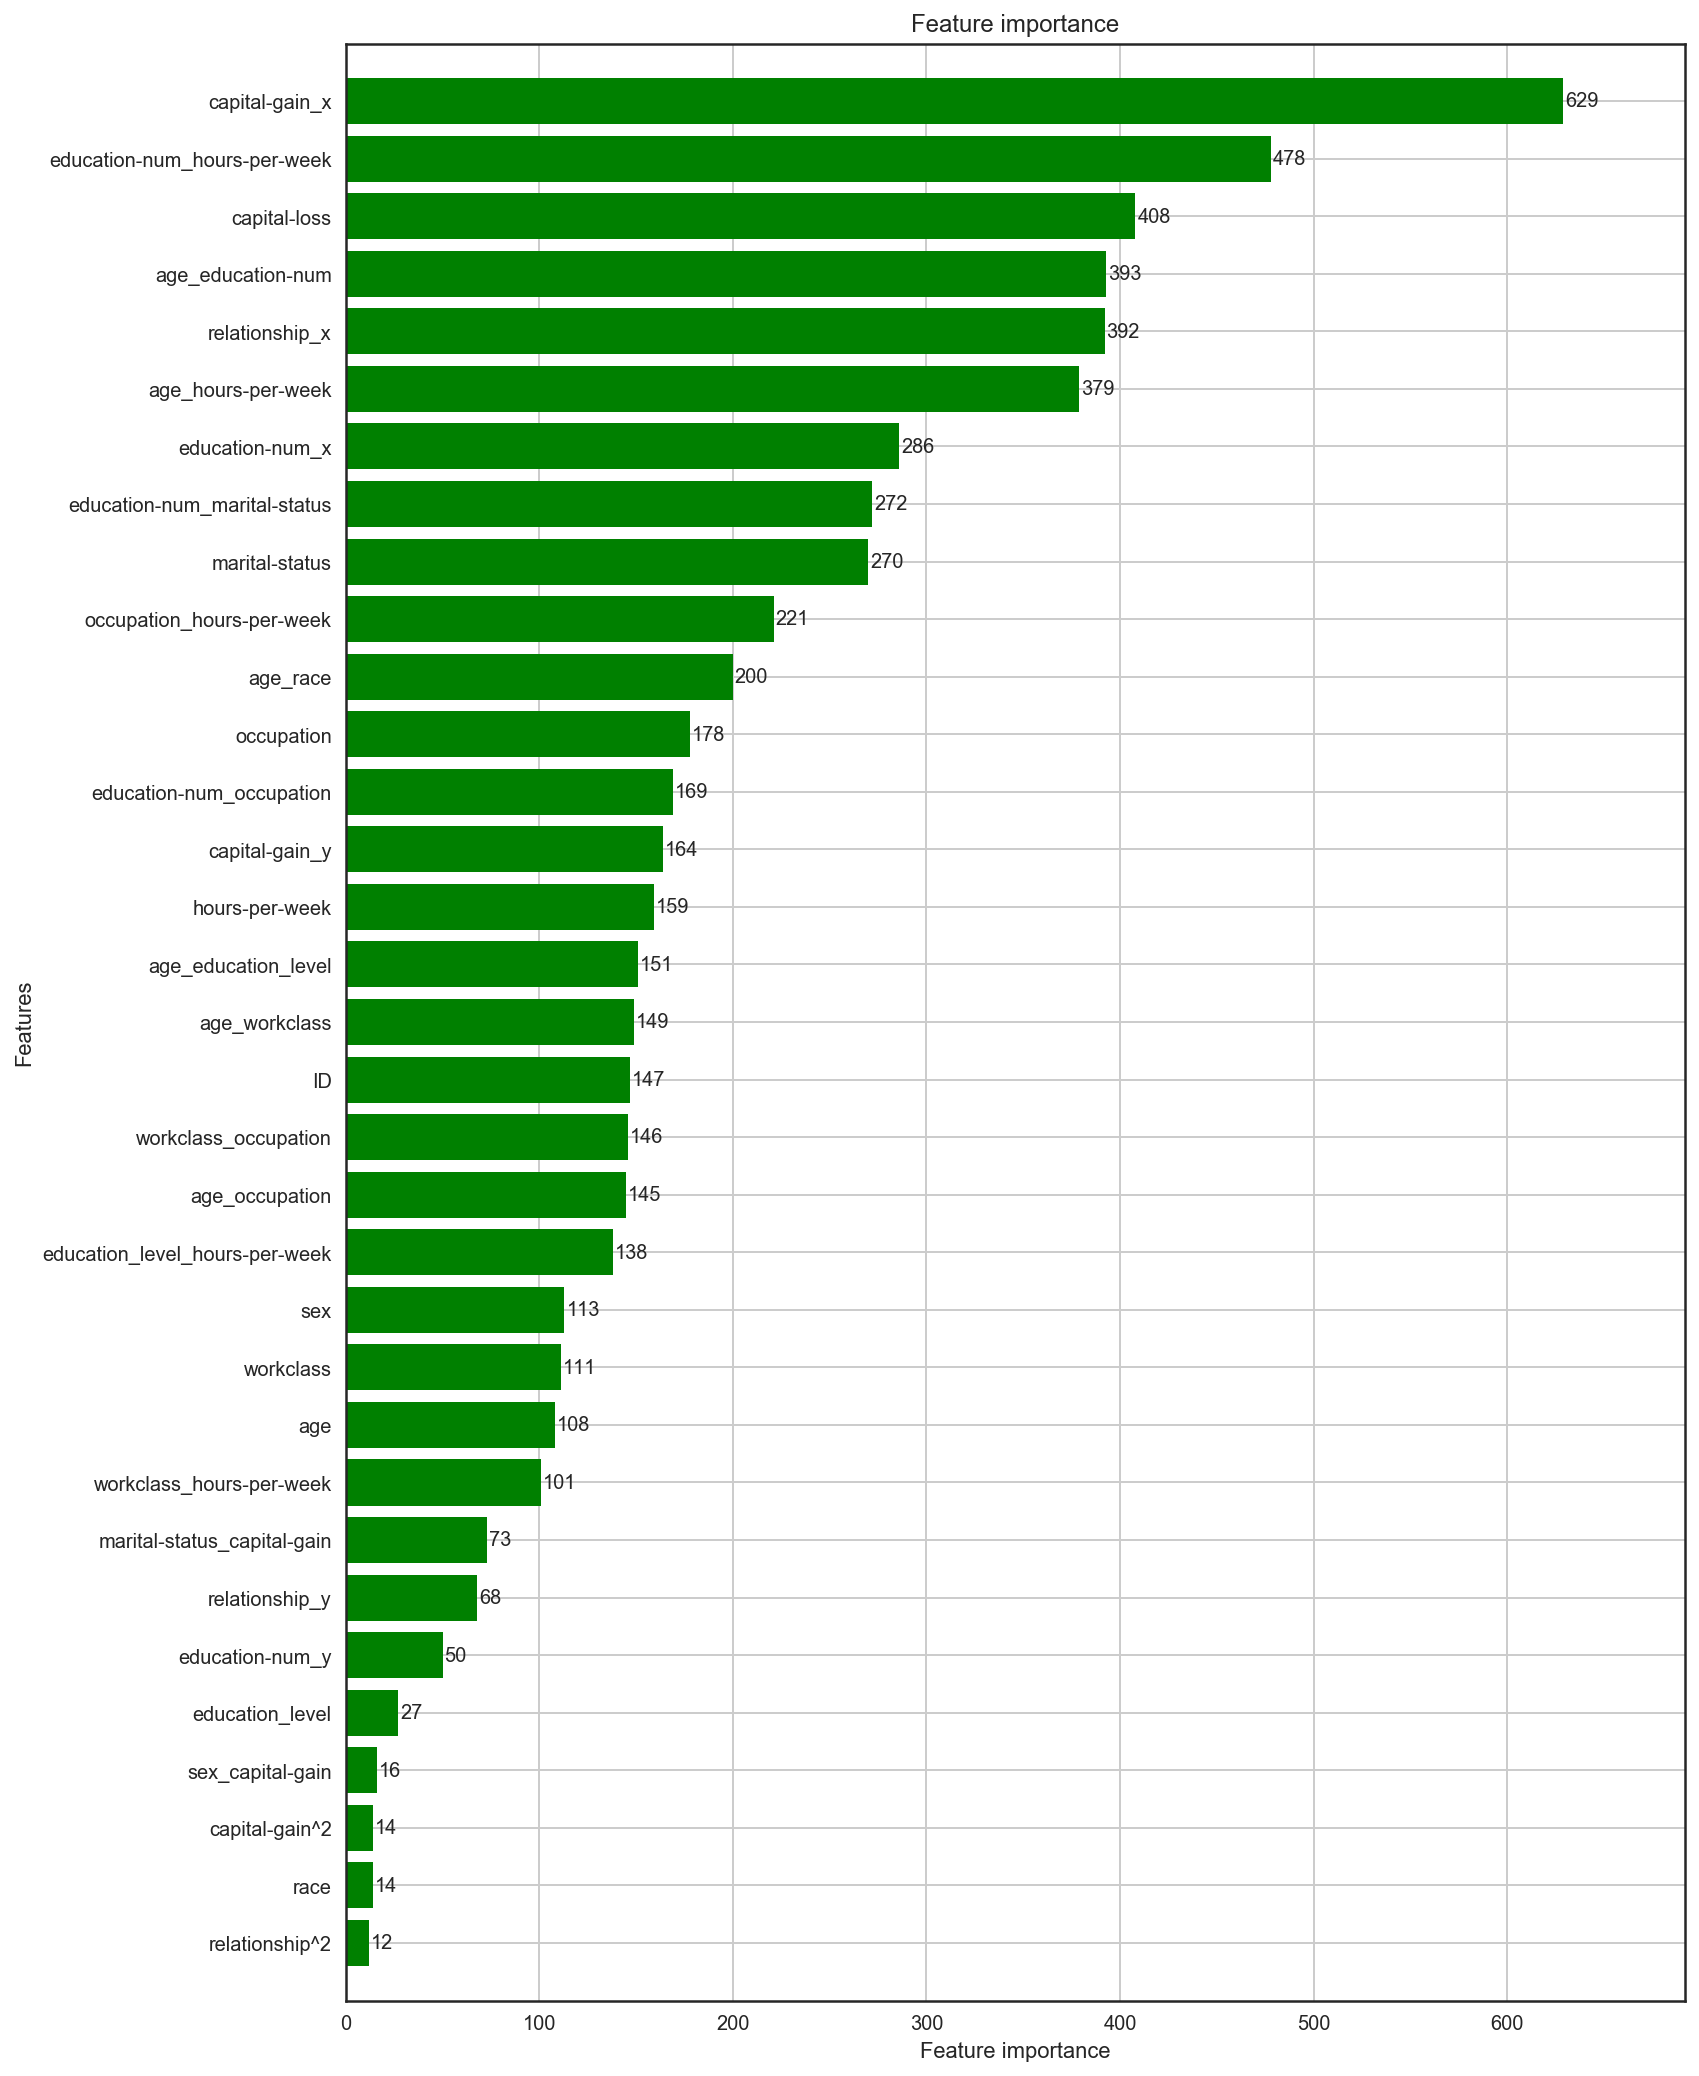

In [110]:
# plot the important features
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(gbm, max_num_features=50, height=0.8, ax=ax, color='g')
plt.show()

In [111]:
# 导出特征重要性  
importance = gbm.feature_importance()
names = gbm.feature_name()
print(names)

['age', 'workclass', 'education_level', 'education-num_x', 'marital-status', 'occupation', 'relationship_x', 'race', 'sex', 'capital-gain_x', 'capital-loss', 'hours-per-week', 'ID', 'education-num_y', 'relationship_y', 'capital-gain_y', 'age_workclass', 'age_education_level', 'age_education-num', 'age_occupation', 'age_race', 'age_hours-per-week', 'workclass_occupation', 'workclass_hours-per-week', 'education_level_hours-per-week', 'education-num_marital-status', 'education-num_occupation', 'education-num_hours-per-week', 'marital-status_capital-gain', 'occupation_hours-per-week', 'relationship^2', 'sex_capital-gain', 'capital-gain^2']


In [112]:
def plot_learning_curve(estimator,
                        title,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=16,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                                            X,
                                                            y,
                                                            cv=cv,
                                                            n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color="g")
    plt.plot(train_sizes,
             train_scores_mean,
             'o-',
             color="r",
             label="Training score")
    plt.plot(train_sizes,
             test_scores_mean,
             'o-',
             color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

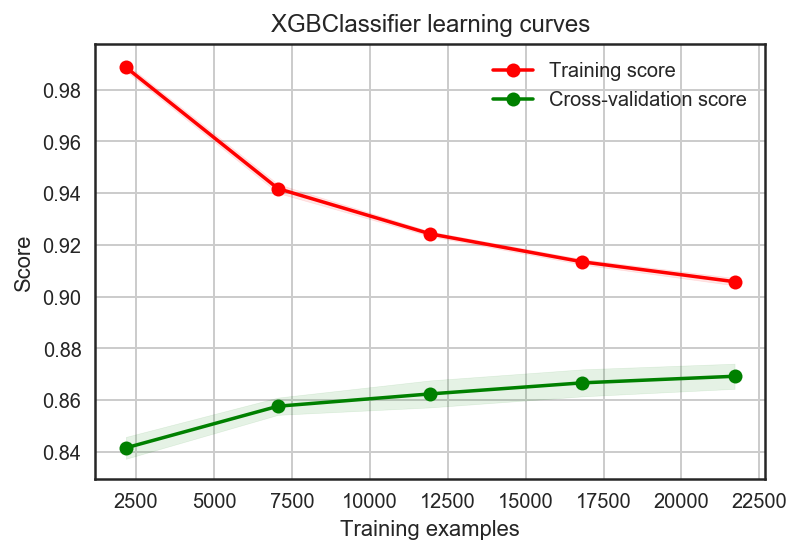

In [113]:
g = plot_learning_curve(xgb_best,"XGBClassifier learning curves",X_train, y_train,cv=kfold)

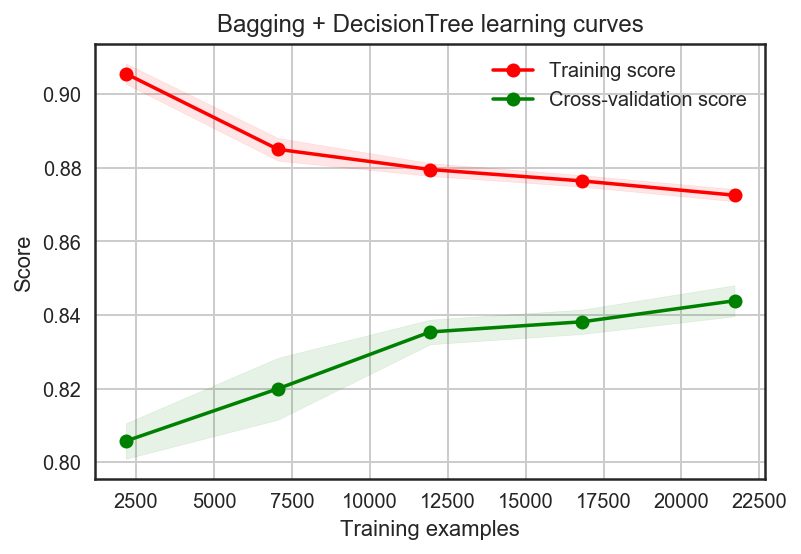

In [114]:
g = plot_learning_curve(bagdt_best,"Bagging + DecisionTree learning curves",X_train, y_train,cv=kfold)

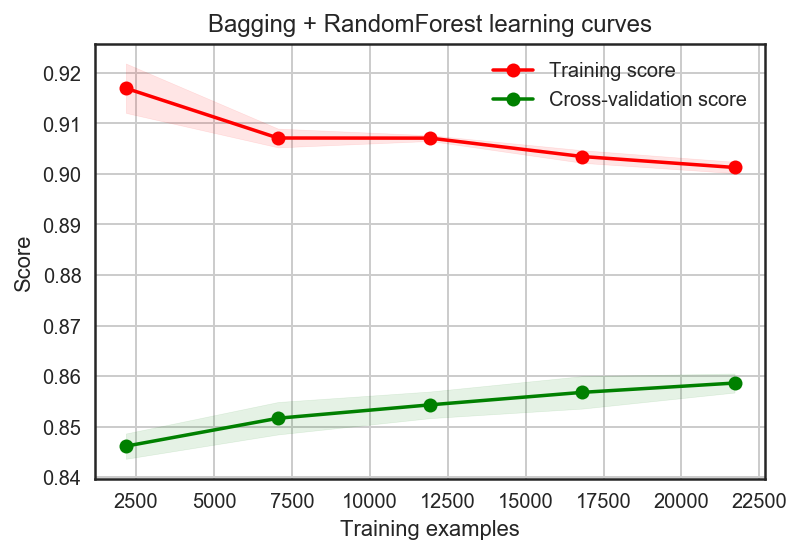

In [115]:
g = plot_learning_curve(bagrf_best,"Bagging + RandomForest learning curves",X_train, y_train,cv=kfold)

In [116]:
# g = plot_learning_curve(dt_best,"DecisionTree learning curves",X_train, y_train,cv=kfold)

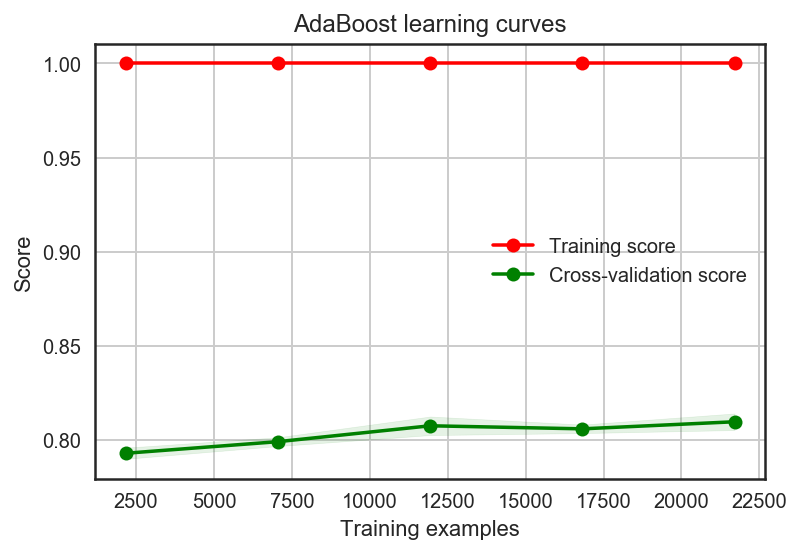

In [117]:
g = plot_learning_curve(ada_best,"AdaBoost learning curves",X_train,y_train,cv=kfold)

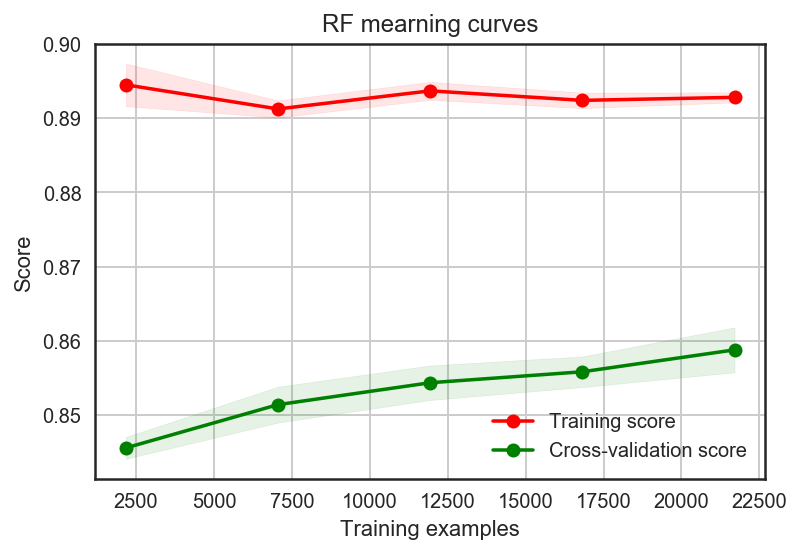

In [118]:
g = plot_learning_curve(RFC_best,"RF mearning curves",X_train,y_train,cv=kfold)

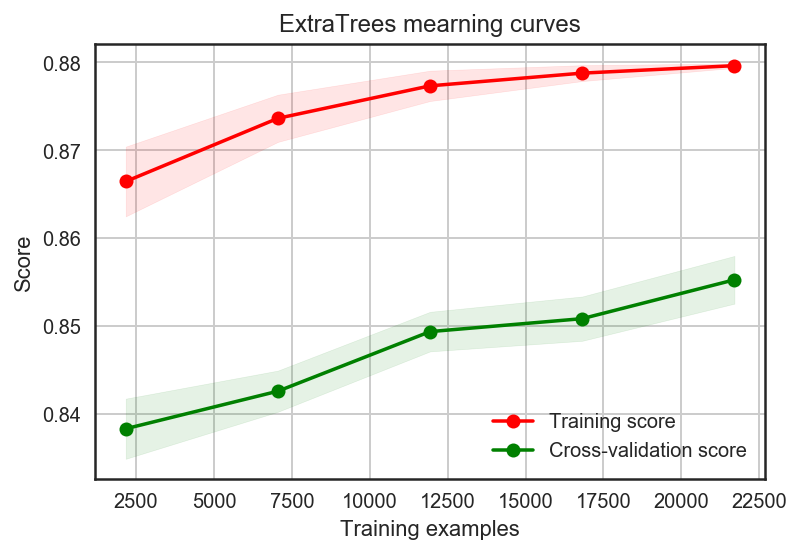

In [119]:
g = plot_learning_curve(ExtC_best,"ExtraTrees mearning curves",X_train,y_train,cv=kfold)

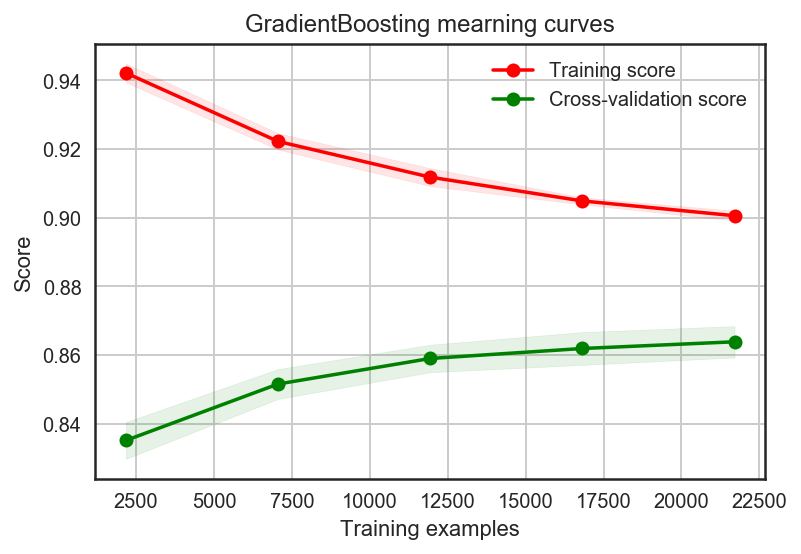

In [120]:
g = plot_learning_curve(GBC_best,"GradientBoosting mearning curves",X_train,y_train,cv=kfold)

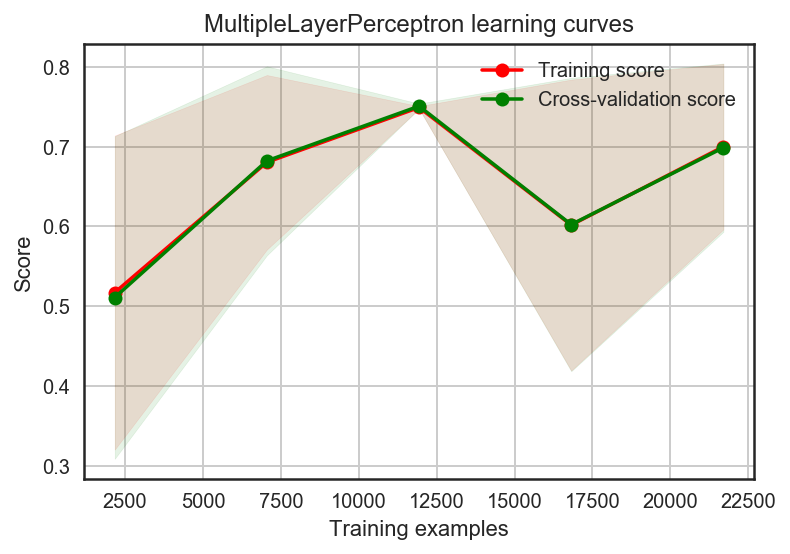

In [121]:
g = plot_learning_curve(mlp_best,"MultipleLayerPerceptron learning curves",X_train,y_train,cv=kfold)

In [122]:
# g = plot_learning_curve(knn_best,"KNeighboors learning curves",X_train,y_train,cv=kfold)

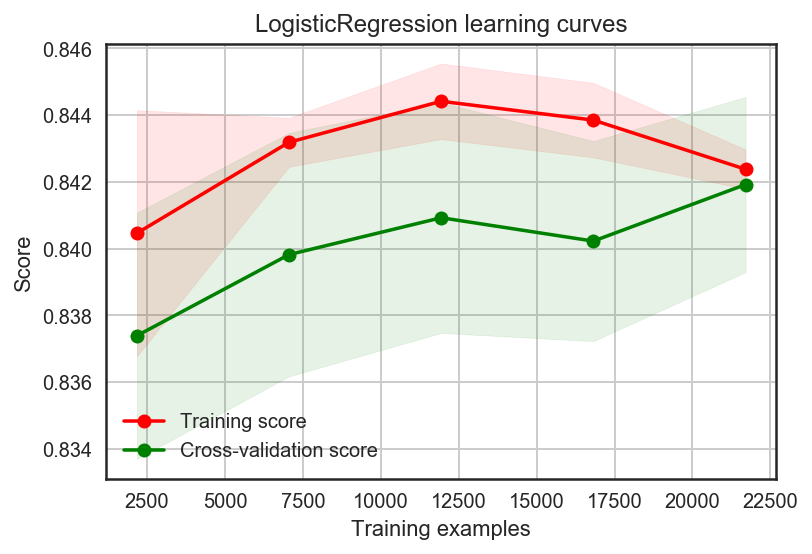

In [123]:
g = plot_learning_curve(lr_best,"LogisticRegression learning curves",X_train,y_train,cv=kfold)

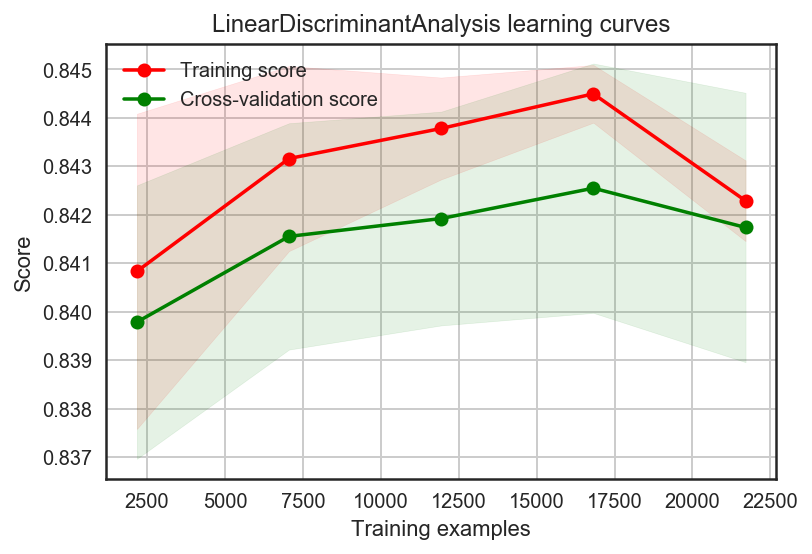

In [124]:
g = plot_learning_curve(lda_best,"LinearDiscriminantAnalysis learning curves",X_train,y_train,cv=kfold)

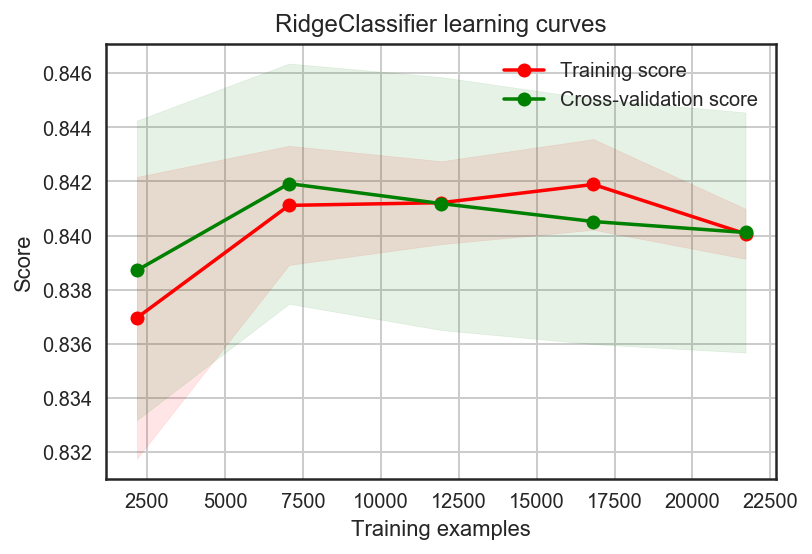

In [125]:
g = plot_learning_curve(rc_best,"RidgeClassifier learning curves",X_train,y_train,cv=kfold)

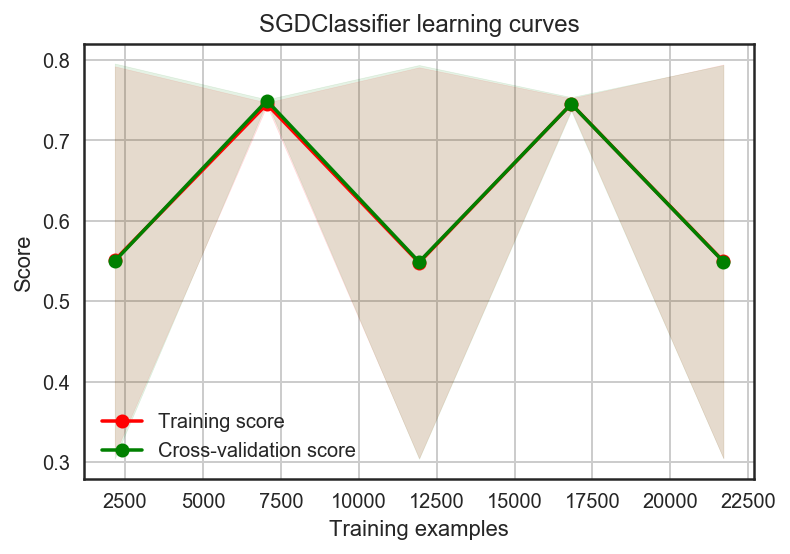

In [126]:
g = plot_learning_curve(sgdc_best,"SGDClassifier learning curves",X_train,y_train,cv=kfold)

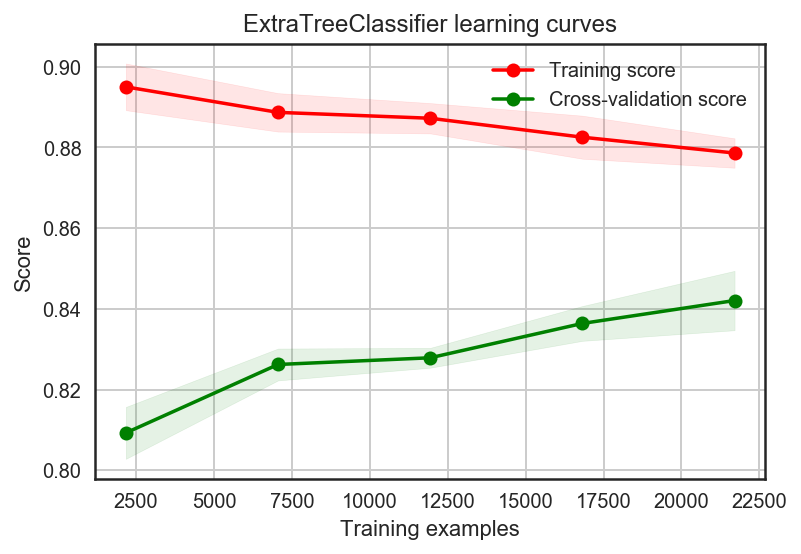

In [127]:
g = plot_learning_curve(etc_best,"ExtraTreeClassifier learning curves",X_train,y_train,cv=kfold)

In [128]:
# g = plot_learning_curve(SVMC_best,"SVC learning curves",X_train,y_train,cv=kfold)

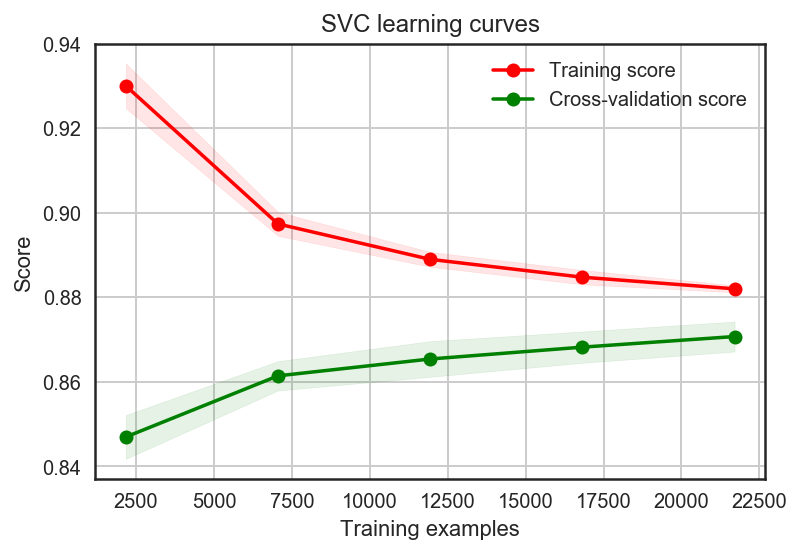

In [129]:
g = plot_learning_curve(lgm_best,"SVC learning curves",X_train,y_train,cv=kfold)

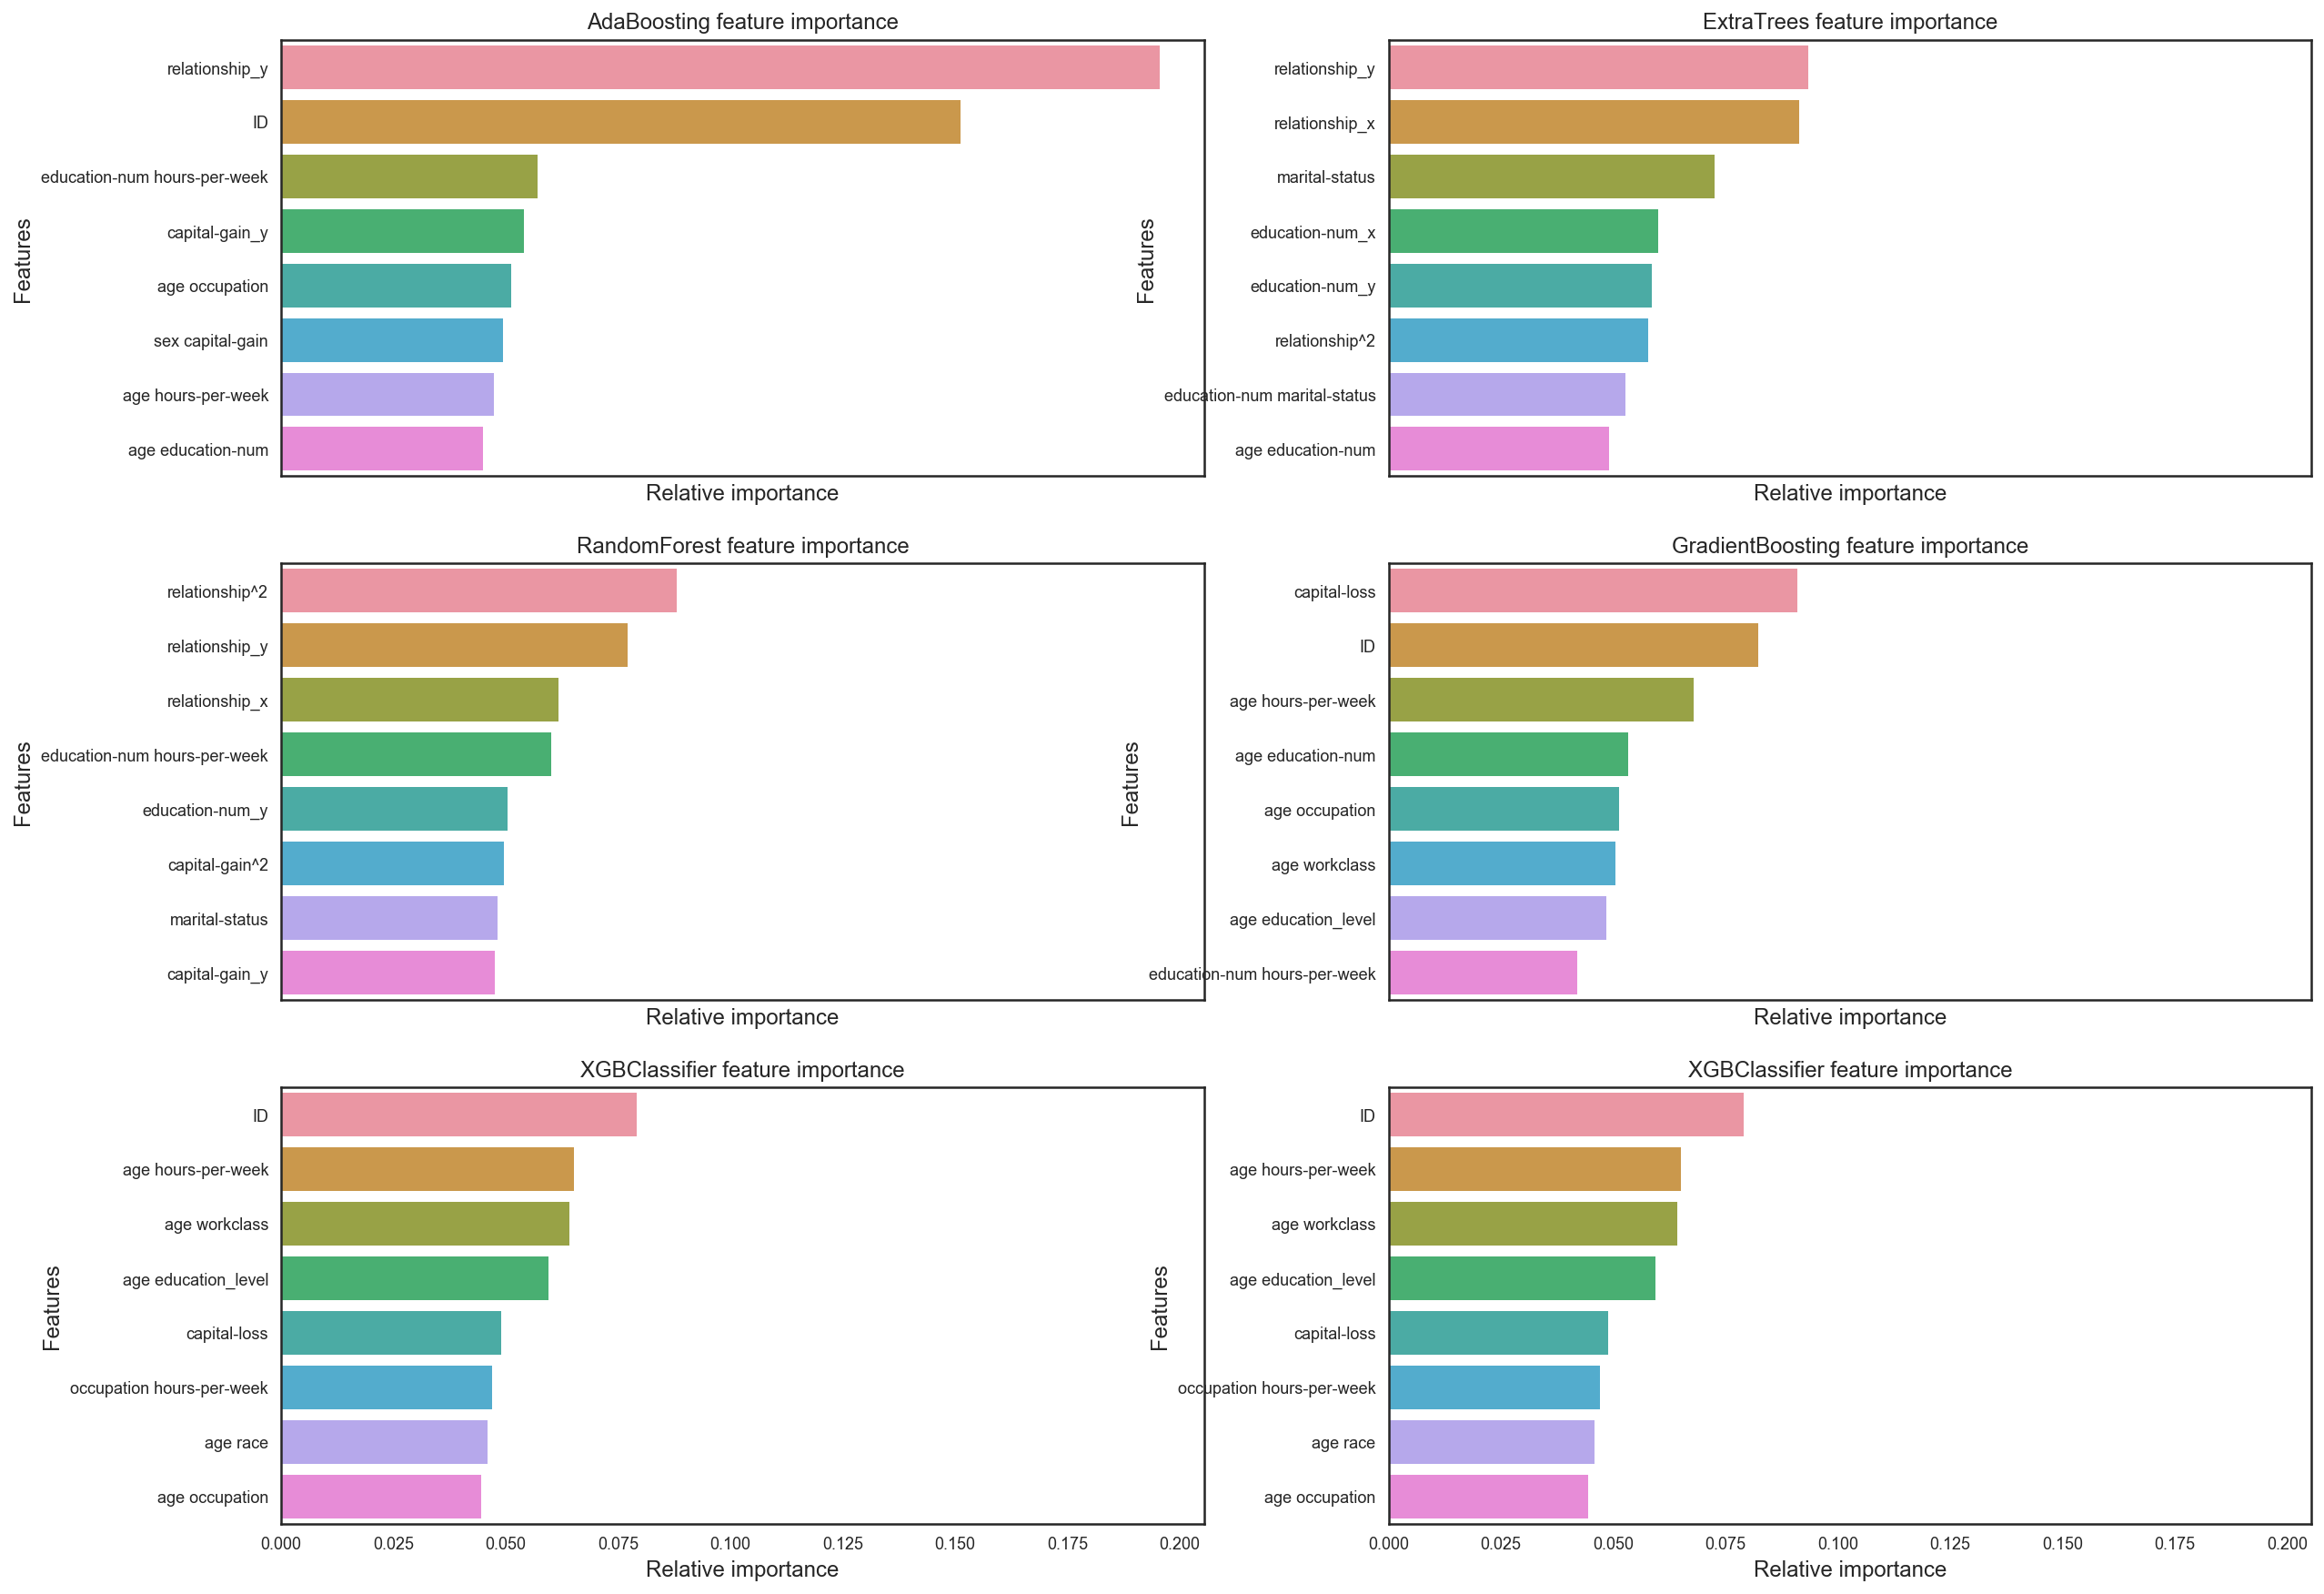

In [131]:
nrows = 3
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(20,15))
#                      ("DecisionTree",dt_best),
names_classifiers = [("AdaBoosting", ada_best),
                     ("ExtraTrees",ExtC_best),
                     ("RandomForest",RFC_best),
                     ("GradientBoosting",GBC_best),
                     ("XGBClassifier",xgb_best),
                     ("XGBClassifier",xgb_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:8]
        g = sns.barplot(y=X_train.columns[indices][:8],x = classifier.feature_importances_[indices][:8] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

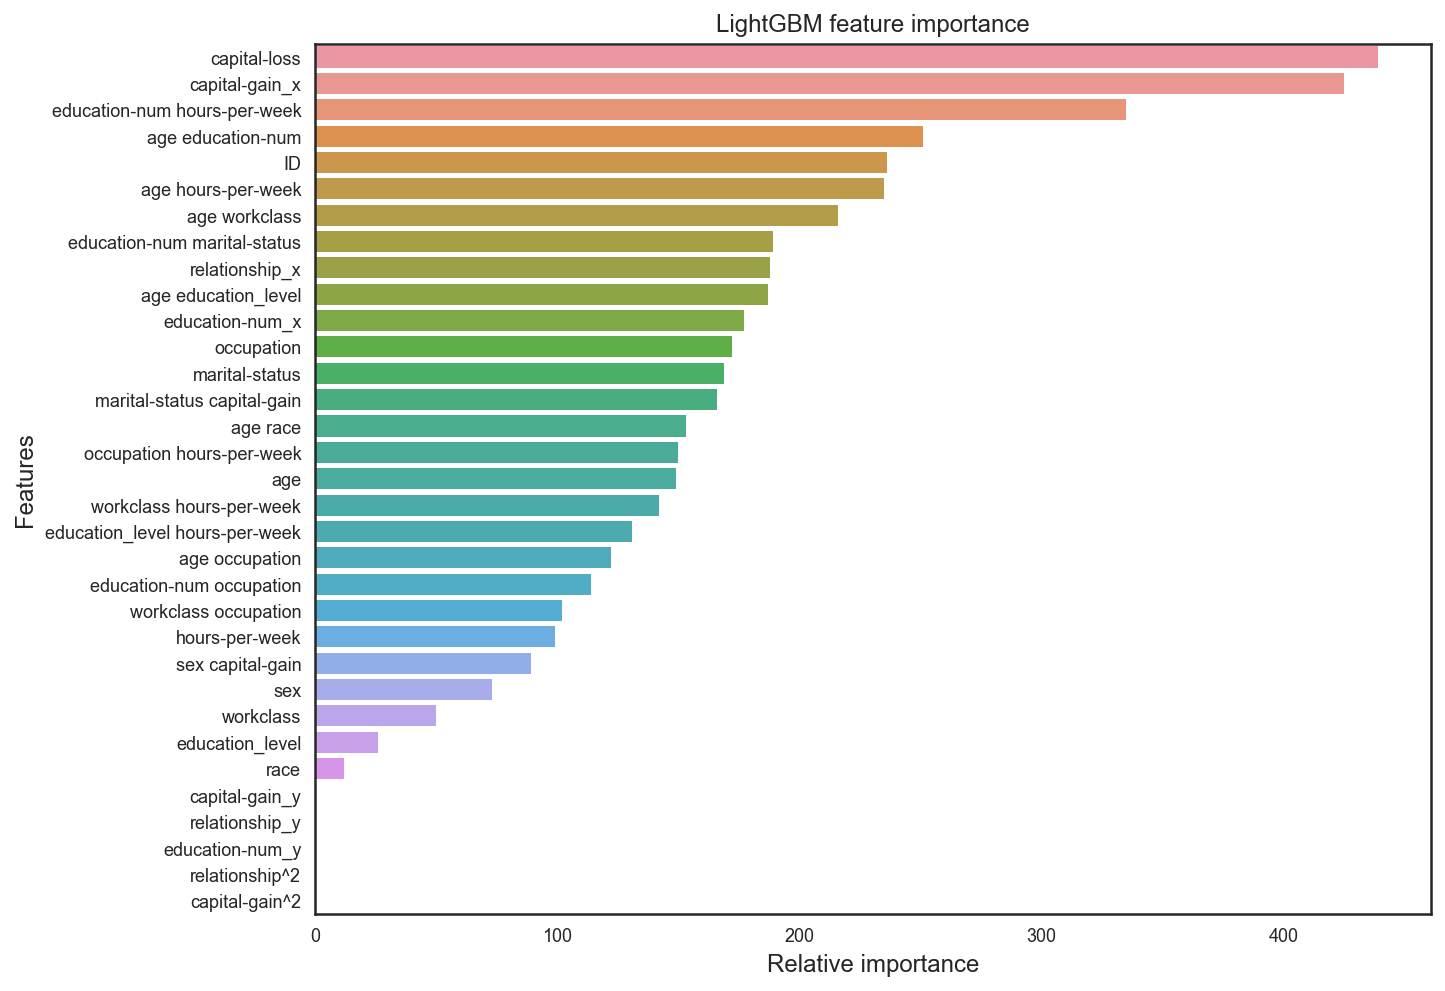

In [132]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(sharex="all", figsize=(10,8))
names_classifiers = [("LightGBM",lgm_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:]
#         print(indices)
#         print("x:", classifier.feature_importances_[indices])
#         print("y:", X_train.columns[indices])
        g = sns.barplot(y=X_train.columns[indices],x = classifier.feature_importances_[indices] , orient='h', ax=axes)
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [138]:
test_RFC = pd.Series(RFC_best.predict(x_test), name="RFC")
test_bagdt = pd.Series(bagdt_best.predict(x_test), name="BagDT")
test_bagrf = pd.Series(bagrf_best.predict(x_test), name="BagRF")
test_AdaC = pd.Series(ada_best.predict(x_test), name="Ada")
test_GBC = pd.Series(GBC_best.predict(x_test), name="GBC")
test_XGB = pd.Series(xgb_best.predict(x_test), name="XGB")
# test_dt = pd.Series(dt_best.predict(x_test), name="DT")
test_lg = pd.Series(lgm_best.predict(x_test), name="LGBM")
test_mlp = pd.Series(mlp_best.predict(x_test), name="MLP")
test_ExtC = pd.Series(ExtC_best.predict(x_test), name="ExtC")
# test_KNN = pd.Series(knn_best.predict(x_test), name="KNN")
test_lr = pd.Series(lr_best.predict(x_test), name="lr")
test_lda = pd.Series(lda_best.predict(x_test), name="LDA")
test_rc = pd.Series(rc_best.predict(x_test), name="rc")
test_sgdc = pd.Series(sgdc_best.predict(x_test), name="SGDC")
test_etc = pd.Series(etc_best.predict(x_test), name="etc")
# test_svm = pd.Series(SVMC_best.predict(x_test), name="SVM")


# Concatenate all classifier results
ensemble_results = pd.concat([test_RFC,
                              test_bagdt,
                              test_bagrf,
                              test_AdaC,
                              test_GBC,
                              test_XGB,
                              test_lg,
                              test_mlp,
                              test_ExtC,
                              test_lr,
                              test_lda,
                              test_rc,
                              test_sgdc,
                              test_etc],axis=1)
# test_KNN,
#                               test_svm],axis=1)

E:\Anaconda3\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
E:\Anaconda3\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(0.5,1,'ensemble_results')

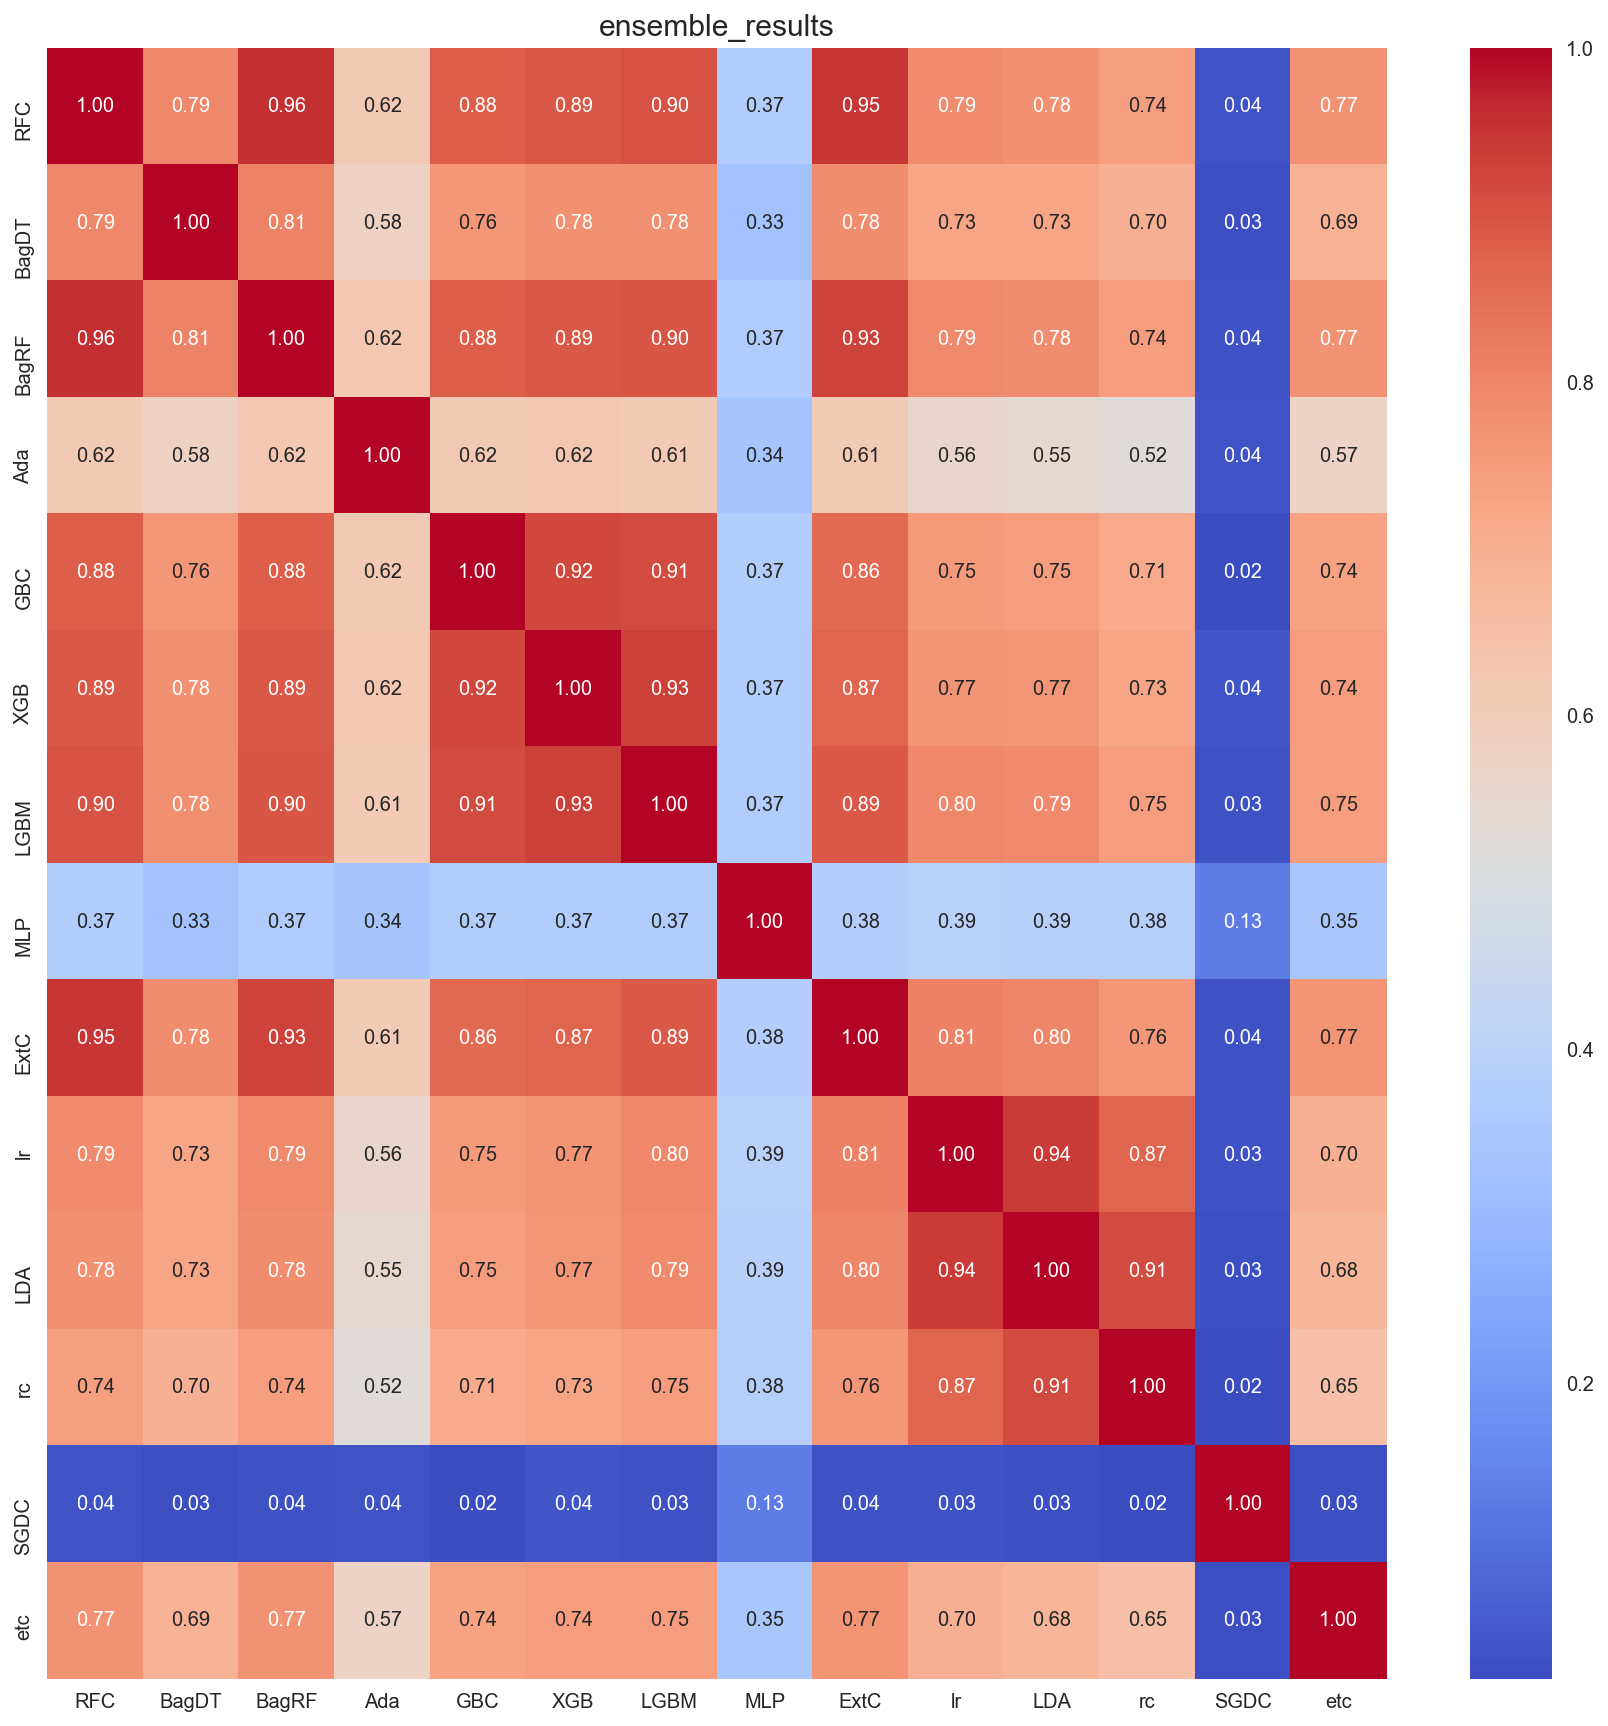

In [139]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
f, ax= plt.subplots(figsize = (15, 15))
g = sns.heatmap(ensemble_results.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax = ax)
# 设置Axes的标题
ax.set_title('ensemble_results', fontsize=15)
# g.set_xticklabels(rotation=30)

In [151]:
votingC = VotingClassifier(estimators=[('GBC', GBC_best),
                                       ('RFC',RFC_best),
                                       ('BagRF',bagrf_best),
                                       ('XGB', xgb_best),
                                       ('lgm', lgm_best)],
                           voting='soft',
                           n_jobs=4)

votingC = votingC.fit(X_train, y_train)
# votingC.predict(x_test)
print(votingC.score(x_val, y_val))

0.862465450525152


E:\Anaconda3\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [152]:
votingD = VotingClassifier(estimators=[('GBC', GBC_best),
                                       ('RFC',RFC_best),
                                       ('BagRF',bagrf_best),
                                       ('XGB', xgb_best),
                                       ('lgm', lgm_best)],
                           voting='hard',
                           n_jobs=4)

votingD = votingC.fit(X_train, y_train)
# votingC.predict(x_test)
print(votingC.score(x_val, y_val))

0.8619126589275843


E:\Anaconda3\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [142]:
# # TODO： 计算准确率
# accuracy = (income==income.replace(0,1)).mean()
# # TODO： 使用上面的公式，并设置beta=0.5计算F-score
# precision=float(n_greater_50k)/n_records
# recall=1
# fscore = (1+0.5**2)*precision*recall/(0.5**2*precision+recall)

# # 打印结果
# print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))